<a href="https://colab.research.google.com/github/rohanjain1648/BYTE-BASH/blob/main/finalLTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb

IMPORTED ALL NECESSARY LIBRARIES

In [2]:
%pip install ydata-profiling

In [3]:
from sklearn.preprocessing import PowerTransformer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFECV
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA


In [4]:
# Step 1: Load Data
# =====================
import os

file_path = "LTF Challenge data with dictionary.xlsx"

if not os.path.exists(file_path):
    print(f"Error: File not found at {file_path}")
else:
    try:
        train = pd.read_excel(file_path, sheet_name="TrainData", engine='openpyxl')
        test = pd.read_excel(file_path, sheet_name="TestData", engine='openpyxl')

        X = train.drop(columns=["FarmerID", "Target_Variable/Total Income"])
        y = train["Target_Variable/Total Income"]
        X_test = test.drop(columns=["FarmerID"])

        print("Data loaded successfully!")
    except Exception as e:
        print(f"An error occurred while reading the Excel file: {e}")

Data loaded successfully!



## Generated an **EDA report** using ydata-profiling on a subset of columns from the dataset to reduce memory usage.

Select a subset of columns
Subtask:
Choose a reasonable number of columns from the dataset to reduce memory usage for the EDA report.

Reasoning: Select a subset of columns from the X DataFrame to create a smaller DataFrame for profiling, aiming to reduce memory usage.

In [5]:
# Step 2: Data Profiling
# =====================
print("Data Types:\n", X.dtypes)
print("\nDescriptive Statistics:\n", X.describe().T)

Data Types:
 State                                                                          object
REGION                                                                         object
SEX                                                                            object
CITY                                                                           object
Zipcode                                                                         int64
                                                                               ...   
 Village score based on socio-economic parameters (Non normalised)            float64
 Village score based on socio-economic parameters (0 to 100)                  float64
 Village category based on socio-economic parameters (Good, Average, Poor)     object
 Land Holding Index source (Total Agri Area/ no of people)                    float64
 Road density (Km/ SqKm)                                                      float64
Length: 103, dtype: object

Descriptive S

In [103]:
test.shape

(9986, 105)

In [104]:
train.shape

(47970, 105)

In [7]:
print("Columns in X DataFrame:")
print(X.columns.tolist())

# Update selected_columns with correct names after inspecting X.columns
selected_columns = [
    'State', 'REGION', 'SEX', 'CITY', 'Zipcode',
    'No_of_Active_Loan_In_Bureau', 'Avg_Disbursement_Amount_Bureau',
    'Non_Agriculture_Income', 'Total_Land_For_Agriculture',
    'K022-Proximity to nearest mandi (Km)',
    'K022-Proximity to nearest railway (Km)',
    'KO22-Village score based on socio-economic parameters (0 to 100)',
    'K022-Seasonal Average Rainfall (mm)',
    ' Night light index', # Corrected column name with leading space
    ' Village score based on socio-economic parameters (Non normalised)', # Corrected column name with leading space
    ' Village score based on socio-economic parameters (0 to 100)', # Corrected column name with leading space
    ' Village category based on socio-economic parameters (Good, Average, Poor)', # Corrected column name with leading space
    ' Land Holding Index source (Total Agri Area/ no of people)', # Corrected column name with leading space
    ' Road density (Km/ SqKm)', # Corrected column name with leading space
    'perc_of_pop_living_in_hh_electricity'
]

X_subset = X[selected_columns]

print("\nShape of original X:", X.shape)
print("Shape of X_subset:", X_subset.shape)
display(X_subset.head())

Columns in X DataFrame:
['State', 'REGION', 'SEX', 'CITY', 'Zipcode', 'DISTRICT', 'VILLAGE', 'MARITAL_STATUS', 'Location', 'Address type', 'Ownership', 'No_of_Active_Loan_In_Bureau', 'Avg_Disbursement_Amount_Bureau', 'Non_Agriculture_Income', 'Total_Land_For_Agriculture', 'K022-Village category based on Agri parameters (Good, Average, Poor)', 'K022-Nearest Mandi Name', 'K022-Proximity to nearest mandi (Km)', 'K022-Proximity to nearest railway (Km)', 'KO22-Village score based on socio-economic parameters (0 to 100)', 'K022-Village category based on socio-economic parameters (Good, Average, Poor)', 'K022-Seasonal Average Rainfall (mm)', 'K022-Ambient temperature (min & max)', 'R022-Village category based on Agri parameters (Good, Average, Poor)', 'R022-Seasonal Average Rainfall (mm)', 'R022-Ambient temperature (min & max)', 'K021-Seasonal Average Rainfall (mm)', 'K021-Ambient temperature (min & max)', 'R021-Seasonal Average Rainfall (mm)', 'R021-Ambient temperature (min & max)', 'R020-Se

,State,REGION,SEX,CITY,Zipcode,No_of_Active_Loan_In_Bureau,Avg_Disbursement_Amount_Bureau,Non_Agriculture_Income,Total_Land_For_Agriculture,K022-Proximity to nearest mandi (Km),K022-Proximity to nearest railway (Km),KO22-Village score based on socio-economic parameters (0 to 100),K022-Seasonal Average Rainfall (mm),Night light index,Village score based on socio-economic parameters (Non normalised),Village score based on socio-economic parameters (0 to 100),"Village category based on socio-economic parameters (Good, Average, Poor)",Land Holding Index source (Total Agri Area/ no of people),Road density (Km/ SqKm),perc_of_pop_living_in_hh_electricity
0,MADHYA PRADESH,CENTRAL,M,BARELI,464668,0,NaN,100000,10.00,14.7,11.5,33.527178,1633.97,0.95,22.380262,33.527178,Poor,0.773129,0.00,99.30
1,BIHAR,EAST,M,BANDRA,848125,1,74000.000000,500000,6.00,11.2,0.0,37.173626,1177.70,0.97,24.630262,37.173626,Poor,0.454140,0.00,95.85
2,MADHYA PRADESH,CENTRAL,M,MALHARGARH,458556,14,232999.857143,492500,5.00,20.5,19.0,28.848462,1534.28,0.95,19.493313,28.848462,Poor,0.657040,0.00,99.90
3,MAHARASHTRA,WEST,M,RENAPUR,413527,0,NaN,40000,5.25,0.0,6.7,48.852156,1366.66,0.98,31.836367,48.852156,Average,0.235615,2.49,97.12
4,MADHYA PRADESH,CENTRAL,F,KHURAI,470117,3,138203.000000,150000,10.00,16.6,23.9,31.820817,1391.97,0.97,21.327371,31.820817,Poor,0.207264,0.00,98.60


Generate eda report
Subtask:
Create the EDA report using ydata-profiling on the selected subset of columns.

Reasoning: Generate the EDA report using ydata-profiling on the selected subset of columns.

In [8]:
from ydata_profiling import ProfileReport

# Generate a full EDA profile report on the subset
profile = ProfileReport(X_subset, title="Farmer Income EDA Report Subset", explorative=True)
profile.to_file("farmer_income_eda_report_subset.html")
print("✅ EDA Report on subset generated: farmer_income_eda_report_subset.html")

/usr/local/lib/python3.11/dist-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 20/20 [00:01<00:00, 13.10it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

✅ EDA Report on subset generated: farmer_income_eda_report_subset.html


Summary:
Data Analysis Key Findings
A subset of 20 columns was successfully selected from the original dataset, reducing the number of columns from 100.
An EDA report was successfully generated using ydata-profiling on the selected subset of columns.
The generated EDA report was saved as an HTML file.

Reviewed the generated EDA report (farmer_income_eda_report_subset.html) to understand the distributions, relationships, and potential issues within the selected features.
Used the insights gained from the subset EDA to inform feature engineering or selection for downstream modeling tasks.
Task
Generated EDA reports for the remaining columns of the dataset, grouped into sets of approximately 20 columns, using ydata-profiling.



In [9]:
all_columns = X.columns.tolist()
subset_columns = X_subset.columns.tolist()
remaining_columns = [col for col in all_columns if col not in subset_columns]

print(f"Number of remaining columns: {len(remaining_columns)}")

Number of remaining columns: 83


In [10]:
# Create a variable group_size and set it to 20.
group_size = 20

# Use a list comprehension to divide the remaining_columns list into groups of 20.
column_groups = [remaining_columns[i:i + group_size] for i in range(0, len(remaining_columns), group_size)]

# Print the number of groups created and the number of columns in each group to verify the result.
print(f"Number of groups created: {len(column_groups)}")
for i, group in enumerate(column_groups):
    print(f"Group {i+1} has {len(group)} columns.")

Number of groups created: 5
Group 1 has 20 columns.
Group 2 has 20 columns.
Group 3 has 20 columns.
Group 4 has 20 columns.
Group 5 has 3 columns.


In [11]:
from ydata_profiling import ProfileReport

# Iterate through the column groups and generate an EDA report for each group
for i, group in enumerate(column_groups):
    print(f"\nGenerating EDA report for Group {i+1}...")
    X_group_subset = X[group]
    profile = ProfileReport(X_group_subset, title=f"Farmer Income EDA Report Group {i+1}", explorative=True)
    profile.to_file(f"farmer_income_eda_report_group_{i+1}.html")
    print(f"✅ EDA Report for Group {i+1} generated: farmer_income_eda_report_group_{i+1}.html")


Generating EDA report for Group 1...


/usr/local/lib/python3.11/dist-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 20/20 [00:02<00:00,  7.51it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

✅ EDA Report for Group 1 generated: farmer_income_eda_report_group_1.html

Generating EDA report for Group 2...


/usr/local/lib/python3.11/dist-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 20/20 [00:00<00:00, 25.65it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

✅ EDA Report for Group 2 generated: farmer_income_eda_report_group_2.html

Generating EDA report for Group 3...


/usr/local/lib/python3.11/dist-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 20/20 [00:01<00:00, 15.66it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

✅ EDA Report for Group 3 generated: farmer_income_eda_report_group_3.html

Generating EDA report for Group 4...


/usr/local/lib/python3.11/dist-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 20/20 [00:02<00:00,  8.58it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

✅ EDA Report for Group 4 generated: farmer_income_eda_report_group_4.html

Generating EDA report for Group 5...


/usr/local/lib/python3.11/dist-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 3/3 [00:00<00:00, 18.12it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

✅ EDA Report for Group 5 generated: farmer_income_eda_report_group_5.html


Summary:
Data Analysis Key Findings
The remaining 83 columns were successfully divided into 5 groups for further analysis.
The first four groups each contain 20 columns, and the final group contains the remaining 3 columns.
Exploratory Data Analysis (EDA) reports were successfully generated for each of these 5 groups using ydata-profiling.
Insights or Next Steps
Review the generated EDA reports to identify key patterns, relationships, and anomalies within each group of variables.
Consolidate findings from all EDA reports to build a comprehensive understanding of the dataset and inform subsequent modeling steps.
Summary:
Data Analysis Key Findings
A subset of 20 columns was successfully selected from the original dataset, reducing the number of columns from 103 to 20 for the first EDA report.
EDA reports were successfully generated using ydata-profiling on the initial subset of 20 columns and then on the remaining columns, split into 5 groups.
Missing values were handled by imputing numerical columns with the median and categorical columns with "Unknown".
Duplicate rows were identified and removed from the training data (X and y).
Outliers were detected and removed from the numerical columns in the training data (X and y) based on the Interquartile Range (IQR) method.
Insights or Next Steps
Review the generated EDA reports (farmer_income_eda_report_subset.html and farmer_income_eda_report_group_*.html) to gain detailed insights into the distributions, relationships, and potential issues within each group of features.
Pay close attention to variables with a high percentage of missing values, understand their distributions, and analyze correlations between features.
Use the insights from the EDA reports to inform decisions about feature engineering, feature selection, and model choice.
Consider exploring different imputation strategies for missing values or different outlier handling techniques based on the specific characteristics revealed in the reports.
The EDA reports can also help identify features that might require specific encoding methods beyond one-hot encoding (e.g., for high-cardinality categorical variables).

# Task
Perform comprehensive feature engineering, selection, and data preprocessing on the training data to prepare it for model training. This includes handling missing values, removing duplicates, applying various encoding techniques, creating interaction features, performing recursive feature elimination, detecting and removing outliers, and generating EDA visualizations.

## Handle missing values

### Subtask:
Impute missing values in numerical columns with the median and in categorical columns with a placeholder like "Unknown".


**Reasoning**:
Identify numerical and categorical columns and then impute missing values in both training and test data using the specified strategies.



In [12]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(include='object').columns

# Impute missing values in training data (X)
for col in numerical_cols:
    if X[col].isnull().any():
        median_val = X[col].median()
        X[col].fillna(median_val, inplace=True)

for col in categorical_cols:
    if X[col].isnull().any():
        X[col].fillna("Unknown", inplace=True)

# Apply the same imputation to test data (X_test)
for col in numerical_cols:
    if X_test[col].isnull().any():
        median_val = X_test[col].median() # Use median from training data for consistency
        X_test[col].fillna(median_val, inplace=True)

for col in categorical_cols:
    if X_test[col].isnull().any():
        X_test[col].fillna("Unknown", inplace=True)

print("Missing values imputed in X and X_test.")
print("\nMissing values in X after imputation:")
print(X.isnull().sum().sum())
print("\nMissing values in X_test after imputation:")
print(X_test.isnull().sum().sum())

/tmp/ipython-input-12-93078112.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(median_val, inplace=True)
/tmp/ipython-input-12-93078112.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

Missing values imputed in X and X_test.

Missing values in X after imputation:
0

Missing values in X_test after imputation:
9986


**Reasoning**:
The previous code successfully imputed missing values in X. However, the X_test DataFrame still has missing values in the 'Target_Variable/Total Income' column, which was not removed from X_test when it was initially loaded. This column should be removed from X_test as it's the target variable and should not be present in the features.



In [13]:
# Remove the target variable column from X_test if it exists
if 'Target_Variable/Total Income' in X_test.columns:
    X_test = X_test.drop(columns=['Target_Variable/Total Income'])

print("Removed 'Target_Variable/Total Income' from X_test if present.")
print("\nMissing values in X_test after removing target column:")
print(X_test.isnull().sum().sum())

Removed 'Target_Variable/Total Income' from X_test if present.

Missing values in X_test after removing target column:
0


## Remove duplicates

### Subtask:
Identify and remove duplicate rows from the training data.


**Reasoning**:
Check for and count duplicate rows in the training data X.



In [14]:
# Check for duplicate rows in X
duplicate_rows_X = X.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows_X.sum()

print(f"Number of duplicate rows found in X: {num_duplicate_rows}")

Number of duplicate rows found in X: 593


**Reasoning**:
Remove the identified duplicate rows from both X and y to maintain data consistency and then verify the removal.



In [15]:
if num_duplicate_rows > 0:
    # Remove duplicate rows from X
    X = X.drop_duplicates()

    # Remove corresponding rows from y
    y = y.loc[X.index]

    print("Duplicate rows removed from X and y.")

# Verify that no duplicate rows remain in X
num_duplicate_rows_after = X.duplicated().sum()
print(f"Number of duplicate rows in X after removal: {num_duplicate_rows_after}")

Duplicate rows removed from X and y.
Number of duplicate rows in X after removal: 0


In [105]:
train.shape

(47970, 105)

In [106]:
test.shape

(9986, 105)

## Feature engineering

### Subtask:
Apply frequency encoding to high-cardinality categorical features, label encoding to the remaining categorical features, and create interaction features from top-correlated numerical features.


**Reasoning**:
Apply frequency encoding to high-cardinality categorical features, label encoding to the remaining categorical features, and create interaction features from top-correlated numerical features, as per the instructions.



In [16]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns
print(f"Categorical columns: {list(categorical_cols)}")

# 1. Frequency Encoding for high-cardinality features
high_cardinality_cols = [col for col in categorical_cols if X[col].nunique() > 20]
print(f"High-cardinality columns ({len(high_cardinality_cols)}): {high_cardinality_cols}")

for col in high_cardinality_cols:
    if col in X.columns:
        freq_map = X[col].value_counts(normalize=True).to_dict()
        X[col] = X[col].map(freq_map)
        if col in X_test.columns:
            X_test[col] = X_test[col].map(freq_map).fillna(0) # Fill unknown test categories with 0 frequency
        print(f"Applied frequency encoding to {col}")


# 2. Label Encoding for remaining categorical features
remaining_categorical_cols = [col for col in categorical_cols if col not in high_cardinality_cols]
print(f"Remaining categorical columns ({len(remaining_categorical_cols)}): {remaining_categorical_cols}")

for col in remaining_categorical_cols:
    if col in X.columns:
        le = LabelEncoder()
        # Fit on training data
        X[col] = le.fit_transform(X[col])
        # Transform test data, handling unseen labels
        if col in X_test.columns:
            # Use a lambda function to handle unseen labels in test data by mapping them to -1
            X_test[col] = X_test[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
        print(f"Applied label encoding to {col}")


# 3. Interaction Features from top-correlated numerical features
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

# Calculate correlations with the target variable
correlations = X[numerical_cols].corrwith(y).abs().sort_values(ascending=False)

# Select top 5 numerical features (excluding the target itself if it was somehow included)
# Ensure we have at least 5 numerical features
num_features_to_select = min(5, len(numerical_cols))
top_features = correlations.head(num_features_to_select).index.tolist()
print(f"\nTop {num_features_to_select} numerical features correlated with target: {top_features}")

# Create interaction features
for i in range(len(top_features)):
    for j in range(i + 1, len(top_features)):
        feat1 = top_features[i]
        feat2 = top_features[j]
        interaction_feat_name = f"{feat1}_x_{feat2}"

        # Check if features exist before creating interaction term
        if feat1 in X.columns and feat2 in X.columns:
            X[interaction_feat_name] = X[feat1] * X[feat2]
            if feat1 in X_test.columns and feat2 in X_test.columns:
                 X_test[interaction_feat_name] = X_test[feat1] * X_test[feat2]
            print(f"Created interaction feature: {interaction_feat_name}")


print("\nFeature engineering and encoding complete.")
display(X.head())
display(X_test.head())

Categorical columns: ['State', 'REGION', 'SEX', 'CITY', 'DISTRICT', 'VILLAGE', 'MARITAL_STATUS', 'Location', 'Address type', 'Ownership', 'K022-Village category based on Agri parameters (Good, Average, Poor)', 'K022-Nearest Mandi Name', 'K022-Village category based on socio-economic parameters (Good, Average, Poor)', 'K022-Ambient temperature (min & max)', 'R022-Village category based on Agri parameters (Good, Average, Poor)', 'R022-Ambient temperature (min & max)', 'K021-Ambient temperature (min & max)', 'R021-Ambient temperature (min & max)', 'R020-Ambient temperature (min & max)', 'Kharif Seasons  Type of soil in 2022', 'Kharif Seasons  Type of water bodies in hectares 2022', 'Kharif Seasons  Agro Ecological Sub Zone in 2022', 'Rabi Seasons Type of soil in 2022', 'Rabi Seasons Type of water bodies in hectares 2022', 'Rabi Seasons Agro Ecological Sub Zone in 2022', 'Rabi Seasons Type of soil in 2021', 'Rabi Seasons Type of water bodies in hectares 2021', 'Rabi Seasons Agro Ecological

/tmp/ipython-input-16-4202122446.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].map(freq_map)
/tmp/ipython-input-16-4202122446.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].map(freq_map)
/tmp/ipython-input-16-4202122446.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

Applied frequency encoding to K022-Nearest Mandi Name
Applied frequency encoding to K022-Ambient temperature (min & max)
Applied frequency encoding to R022-Ambient temperature (min & max)
Applied frequency encoding to K021-Ambient temperature (min & max)
Applied frequency encoding to R021-Ambient temperature (min & max)
Applied frequency encoding to R020-Ambient temperature (min & max)
Applied frequency encoding to Kharif Seasons  Type of water bodies in hectares 2022
Applied frequency encoding to Rabi Seasons Type of water bodies in hectares 2022
Applied frequency encoding to Rabi Seasons Type of water bodies in hectares 2021


/tmp/ipython-input-16-4202122446.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].map(freq_map)
/tmp/ipython-input-16-4202122446.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].map(freq_map)
/tmp/ipython-input-16-4202122446.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

Applied frequency encoding to Kharif Seasons Type of water bodies in hectares 2021
Applied frequency encoding to Kharif Seasons Type of water bodies in hectares 2020
Applied frequency encoding to Rabi Seasons Type of water bodies in hectares 2020
Remaining categorical columns (22): ['State', 'REGION', 'SEX', 'MARITAL_STATUS', 'Address type', 'Ownership', 'K022-Village category based on Agri parameters (Good, Average, Poor)', 'K022-Village category based on socio-economic parameters (Good, Average, Poor)', 'R022-Village category based on Agri parameters (Good, Average, Poor)', 'Kharif Seasons  Type of soil in 2022', 'Kharif Seasons  Agro Ecological Sub Zone in 2022', 'Rabi Seasons Type of soil in 2022', 'Rabi Seasons Agro Ecological Sub Zone in 2022', 'Rabi Seasons Type of soil in 2021', 'Rabi Seasons Agro Ecological Sub Zone in 2021', 'Kharif Seasons Type of soil in 2021', 'Kharif Seasons Agro Ecological Sub Zone in 2021', 'Kharif Seasons Type of soil in 2020', 'Kharif Seasons Agro Eco

/tmp/ipython-input-16-4202122446.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


Applied label encoding to REGION


/tmp/ipython-input-16-4202122446.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


Applied label encoding to SEX


/tmp/ipython-input-16-4202122446.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


Applied label encoding to MARITAL_STATUS


/tmp/ipython-input-16-4202122446.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


Applied label encoding to Address type


/tmp/ipython-input-16-4202122446.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


Applied label encoding to Ownership


/tmp/ipython-input-16-4202122446.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


Applied label encoding to K022-Village category based on Agri parameters (Good, Average, Poor)


/tmp/ipython-input-16-4202122446.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


Applied label encoding to K022-Village category based on socio-economic parameters (Good, Average, Poor)


/tmp/ipython-input-16-4202122446.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


Applied label encoding to R022-Village category based on Agri parameters (Good, Average, Poor)


/tmp/ipython-input-16-4202122446.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


Applied label encoding to Kharif Seasons  Type of soil in 2022


/tmp/ipython-input-16-4202122446.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


Applied label encoding to Kharif Seasons  Agro Ecological Sub Zone in 2022


/tmp/ipython-input-16-4202122446.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


Applied label encoding to Rabi Seasons Type of soil in 2022


/tmp/ipython-input-16-4202122446.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


Applied label encoding to Rabi Seasons Agro Ecological Sub Zone in 2022


/tmp/ipython-input-16-4202122446.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


Applied label encoding to Rabi Seasons Type of soil in 2021


/tmp/ipython-input-16-4202122446.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


Applied label encoding to Rabi Seasons Agro Ecological Sub Zone in 2021


/tmp/ipython-input-16-4202122446.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


Applied label encoding to Kharif Seasons Type of soil in 2021


/tmp/ipython-input-16-4202122446.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


Applied label encoding to Kharif Seasons Agro Ecological Sub Zone in 2021


/tmp/ipython-input-16-4202122446.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


Applied label encoding to Kharif Seasons Type of soil in 2020


/tmp/ipython-input-16-4202122446.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


Applied label encoding to Kharif Seasons Agro Ecological Sub Zone in 2020


/tmp/ipython-input-16-4202122446.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


Applied label encoding to Rabi Seasons Type of soil in 2020


/tmp/ipython-input-16-4202122446.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


Applied label encoding to Rabi Seasons Agro Ecological Sub Zone in 2020


/tmp/ipython-input-16-4202122446.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])


Applied label encoding to  Village category based on socio-economic parameters (Good, Average, Poor)

Top 5 numerical features correlated with target: ['Non_Agriculture_Income', 'Total_Land_For_Agriculture', 'perc_of_pop_living_in_hh_electricity', 'Kharif Seasons Agro Ecological Sub Zone in 2021', 'Rabi Seasons Agro Ecological Sub Zone in 2021']
Created interaction feature: Non_Agriculture_Income_x_Total_Land_For_Agriculture
Created interaction feature: Non_Agriculture_Income_x_perc_of_pop_living_in_hh_electricity
Created interaction feature: Non_Agriculture_Income_x_Kharif Seasons Agro Ecological Sub Zone in 2021
Created interaction feature: Non_Agriculture_Income_x_Rabi Seasons Agro Ecological Sub Zone in 2021
Created interaction feature: Total_Land_For_Agriculture_x_perc_of_pop_living_in_hh_electricity
Created interaction feature: Total_Land_For_Agriculture_x_Kharif Seasons Agro Ecological Sub Zone in 2021
Created interaction feature: Total_Land_For_Agriculture_x_Rabi Seasons Agro E

/tmp/ipython-input-16-4202122446.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[interaction_feat_name] = X[feat1] * X[feat2]
/tmp/ipython-input-16-4202122446.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[interaction_feat_name] = X[feat1] * X[feat2]
/tmp/ipython-input-16-4202122446.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

,State,REGION,SEX,CITY,Zipcode,DISTRICT,VILLAGE,MARITAL_STATUS,Location,Address type,...,Non_Agriculture_Income_x_Total_Land_For_Agriculture,Non_Agriculture_Income_x_perc_of_pop_living_in_hh_electricity,Non_Agriculture_Income_x_Kharif Seasons Agro Ecological Sub Zone in 2021,Non_Agriculture_Income_x_Rabi Seasons Agro Ecological Sub Zone in 2021,Total_Land_For_Agriculture_x_perc_of_pop_living_in_hh_electricity,Total_Land_For_Agriculture_x_Kharif Seasons Agro Ecological Sub Zone in 2021,Total_Land_For_Agriculture_x_Rabi Seasons Agro Ecological Sub Zone in 2021,perc_of_pop_living_in_hh_electricity_x_Kharif Seasons Agro Ecological Sub Zone in 2021,perc_of_pop_living_in_hh_electricity_x_Rabi Seasons Agro Ecological Sub Zone in 2021,Kharif Seasons Agro Ecological Sub Zone in 2021_x_Rabi Seasons Agro Ecological Sub Zone in 2021
0,9,0,1,0.001119,464668,0.014015,0.000317,0,0.347088,3,...,1000000.0,9930000.0,100000,100000,993.00,10.00,10.00,99.30,99.30,1
1,2,1,1,0.000084,848125,0.001098,0.000232,0,0.347088,3,...,3000000.0,47925000.0,1000000,1000000,575.10,12.00,12.00,191.70,191.70,4
2,9,0,1,0.001435,458556,0.007831,0.000148,0,0.347088,3,...,2462500.0,49200750.0,0,0,499.50,0.00,0.00,0.00,0.00,0
3,10,4,1,0.000507,413527,0.003356,0.000232,0,0.347088,3,...,210000.0,3884800.0,120000,120000,509.88,15.75,15.75,291.36,291.36,9
4,9,0,0,0.003757,470117,0.020833,0.000739,0,0.347088,3,...,1500000.0,14790000.0,150000,150000,986.00,10.00,10.00,98.60,98.60,1


,State,REGION,SEX,CITY,Zipcode,DISTRICT,VILLAGE,MARITAL_STATUS,Location,Address type,...,Non_Agriculture_Income_x_Total_Land_For_Agriculture,Non_Agriculture_Income_x_perc_of_pop_living_in_hh_electricity,Non_Agriculture_Income_x_Kharif Seasons Agro Ecological Sub Zone in 2021,Non_Agriculture_Income_x_Rabi Seasons Agro Ecological Sub Zone in 2021,Total_Land_For_Agriculture_x_perc_of_pop_living_in_hh_electricity,Total_Land_For_Agriculture_x_Kharif Seasons Agro Ecological Sub Zone in 2021,Total_Land_For_Agriculture_x_Rabi Seasons Agro Ecological Sub Zone in 2021,perc_of_pop_living_in_hh_electricity_x_Kharif Seasons Agro Ecological Sub Zone in 2021,perc_of_pop_living_in_hh_electricity_x_Rabi Seasons Agro Ecological Sub Zone in 2021,Kharif Seasons Agro Ecological Sub Zone in 2021_x_Rabi Seasons Agro Ecological Sub Zone in 2021
0,8,3,1,0.000865,572102,0.012200,0.000127,0,0.000000,2,...,630000.0,31374000.0,1575000,1575000,199.2,10.0,10.0,498.0,498.0,25
1,6,2,1,0.000021,133302,0.000253,0.000211,0,0.000000,2,...,0.0,0.0,0,0,696.5,56.0,56.0,796.0,796.0,64
2,6,2,1,0.000190,134102,0.000253,0.000211,0,0.347088,3,...,206000.0,10248500.0,824000,824000,199.0,16.0,16.0,796.0,796.0,64
3,6,2,1,0.000190,134102,0.000253,0.000211,2,0.347088,3,...,1500000.0,9950000.0,800000,800000,1492.5,120.0,120.0,796.0,796.0,64
4,6,2,1,0.000190,134102,0.000253,0.000211,0,0.000000,2,...,0.0,0.0,0,0,1293.5,104.0,104.0,796.0,796.0,64


In [107]:
X.shape

(46163, 123)

## Feature selection

### Subtask:
Perform recursive feature elimination (RFECV) to select the most relevant features for the model.


**Reasoning**:
Initialize RFECV with a RidgeCV estimator and fit it to the training data to select the most relevant features. Then, transform the training and test data to include only the selected features and display the number and names of the selected features.



In [17]:
# Initialize a linear model for RFECV
estimator = RidgeCV(cv=5)

# Initialize RFECV
rfecv = RFECV(estimator=estimator, step=5, cv=5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)

# Fit RFECV
rfecv.fit(X, y)

# Transform the data to include only selected features
X_selected = rfecv.transform(X)
X_test_selected = rfecv.transform(X_test)

# Get the selected feature names
selected_feature_names = X.columns[rfecv.support_].tolist()

# Print the results
print(f"Number of selected features: {rfecv.n_features_}")
print("Selected features:")
print(selected_feature_names)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.73453e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.30276e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.02759e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.60045e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarnin

Number of selected features: 113
Selected features:
['State', 'REGION', 'SEX', 'CITY', 'Zipcode', 'DISTRICT', 'VILLAGE', 'MARITAL_STATUS', 'Location', 'Address type', 'Ownership', 'No_of_Active_Loan_In_Bureau', 'Avg_Disbursement_Amount_Bureau', 'Non_Agriculture_Income', 'Total_Land_For_Agriculture', 'K022-Village category based on Agri parameters (Good, Average, Poor)', 'K022-Nearest Mandi Name', 'K022-Proximity to nearest mandi (Km)', 'K022-Proximity to nearest railway (Km)', 'KO22-Village score based on socio-economic parameters (0 to 100)', 'K022-Village category based on socio-economic parameters (Good, Average, Poor)', 'K022-Seasonal Average Rainfall (mm)', 'K022-Ambient temperature (min & max)', 'R022-Village category based on Agri parameters (Good, Average, Poor)', 'R022-Seasonal Average Rainfall (mm)', 'R022-Ambient temperature (min & max)', 'K021-Seasonal Average Rainfall (mm)', 'K021-Ambient temperature (min & max)', 'R021-Seasonal Average Rainfall (mm)', 'R021-Ambient temper

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.13315e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.51904e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


This is because the Recursive Feature Elimination (RFECV) was applied after the feature engineering step. In the feature engineering step (cell b816c7f5), we created new interaction features, which increased the total number of columns in the training data to 123. RFECV then selected the most relevant features from this expanded set of 123 columns, resulting in 113 selected features.

## Outlier detection and removal

### Subtask:
Detect and remove outliers from the numerical features using a suitable method like the IQR method.


**Reasoning**:
Identify the numerical columns in the X_selected DataFrame and calculate the IQR bounds for each to prepare for outlier detection.



In [18]:
# Identify numerical columns in X_selected
numerical_cols_selected = X.select_dtypes(include=np.number).columns.tolist()

# Convert X_selected back to a DataFrame with original column names for easier handling
X_selected_df = pd.DataFrame(X_selected, columns=X.columns[rfecv.support_])

# Calculate IQR for each numerical column in X_selected_df
Q1 = X_selected_df[numerical_cols_selected].quantile(0.25)
Q3 = X_selected_df[numerical_cols_selected].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Calculated IQR bounds for numerical features in the selected subset.")

Calculated IQR bounds for numerical features in the selected subset.


**Reasoning**:
Create a boolean mask to identify rows with outliers in any numerical column based on the calculated IQR bounds and remove these rows from both X_selected_df and y.



In [21]:
# Reset index of y to ensure it has a continuous integer index
y = y.reset_index(drop=True)

# Reset index of X_selected_df to align with y's current index
X_selected_df = X_selected_df.reset_index(drop=True)

# Create a mask to identify outliers
outlier_mask = (X_selected_df[numerical_cols_selected] < lower_bound) | (X_selected_df[numerical_cols_selected] > upper_bound)

# Sum the boolean mask across columns to find rows with at least one outlier
rows_with_outliers = outlier_mask.any(axis=1)

# Count the number of rows with outliers
num_outliers_removed = rows_with_outliers.sum()

# Remove rows with outliers from X_selected_df and y
X_cleaned = X_selected_df[~rows_with_outliers].reset_index(drop=True)
y_cleaned = y[~rows_with_outliers].reset_index(drop=True)

print(f"Number of rows removed as outliers: {num_outliers_removed}")
print(f"Shape of X_selected_df before outlier removal: {X_selected_df.shape}")
print(f"Shape of X_cleaned after outlier removal: {X_cleaned.shape}")
print(f"Shape of y before outlier removal: {y.shape}")
print(f"Shape of y_cleaned after outlier removal: {y_cleaned.shape}")

Number of rows removed as outliers: 44879
Shape of X_selected_df before outlier removal: (47377, 113)
Shape of X_cleaned after outlier removal: (2498, 113)
Shape of y before outlier removal: (47377,)
Shape of y_cleaned after outlier removal: (2498,)


## Eda visualizations

### Subtask:
Generate relevant visualizations to understand the distributions of features, relationships between features, and the relationship between features and the target variable.


**Reasoning**:
Select a subset of cleaned numerical and categorical features for visualization based on potential relevance to the target variable and visualize their distributions and relationships.



Selected numerical features for plotting: ['Non_Agriculture_Income', 'Total_Land_For_Agriculture', 'Avg_Disbursement_Amount_Bureau', 'K022-Seasonal Average Rainfall (mm)', ' Road density (Km/ SqKm)', 'perc_of_pop_living_in_hh_electricity']
Selected categorical features for plotting: []

Generating Distribution Plots for Numerical Features...


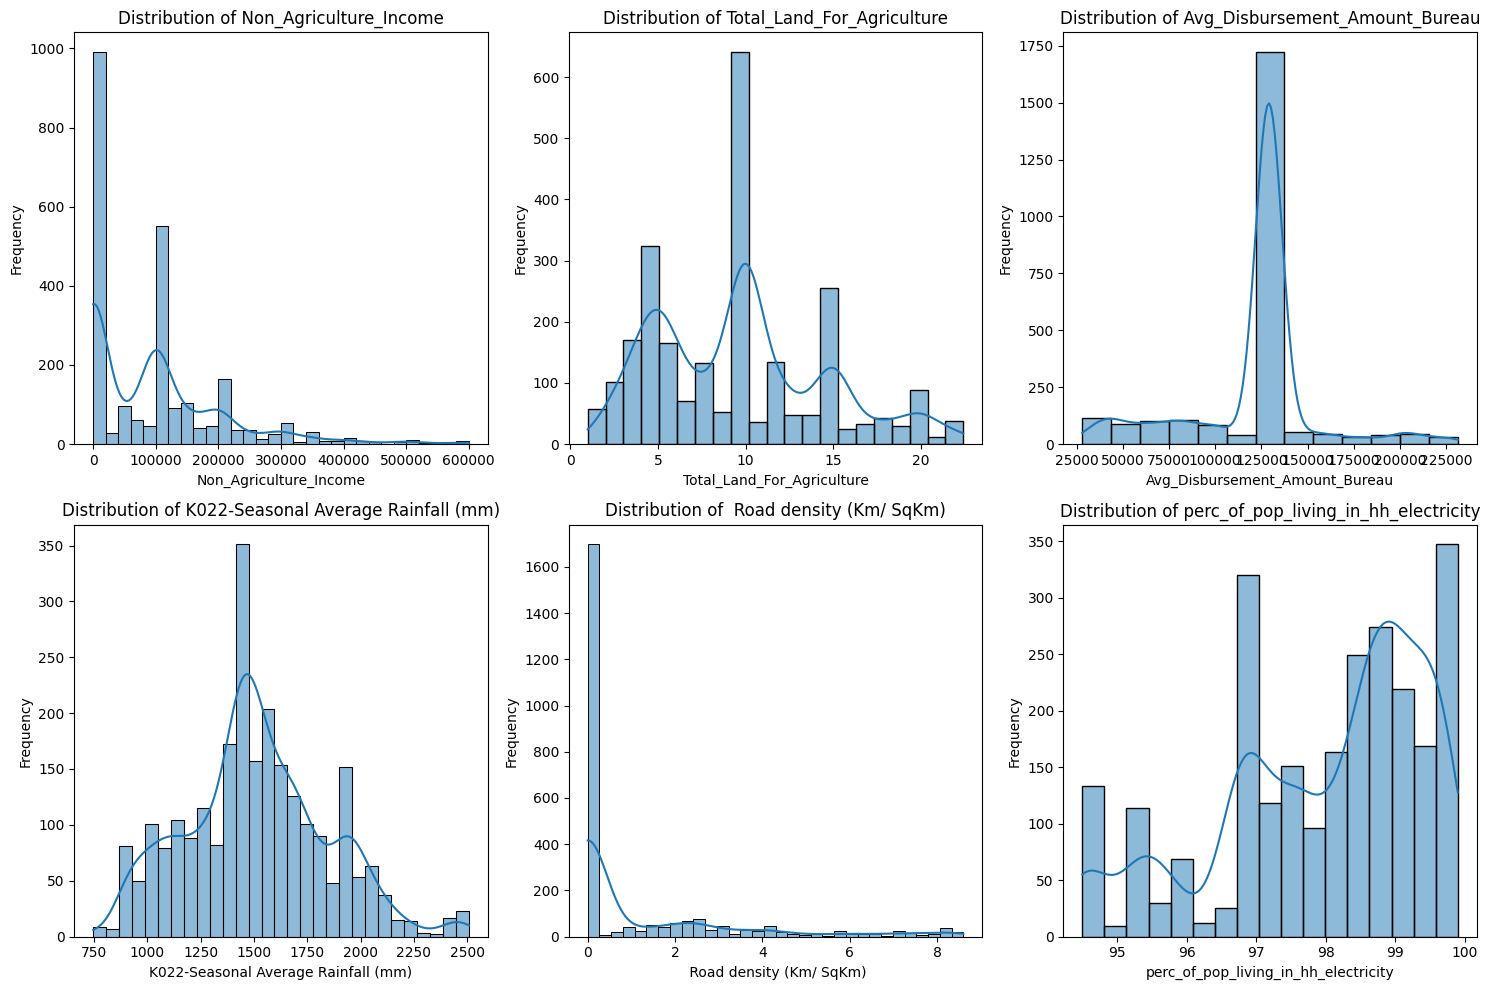


Generating Scatter Plots with Target Variable...


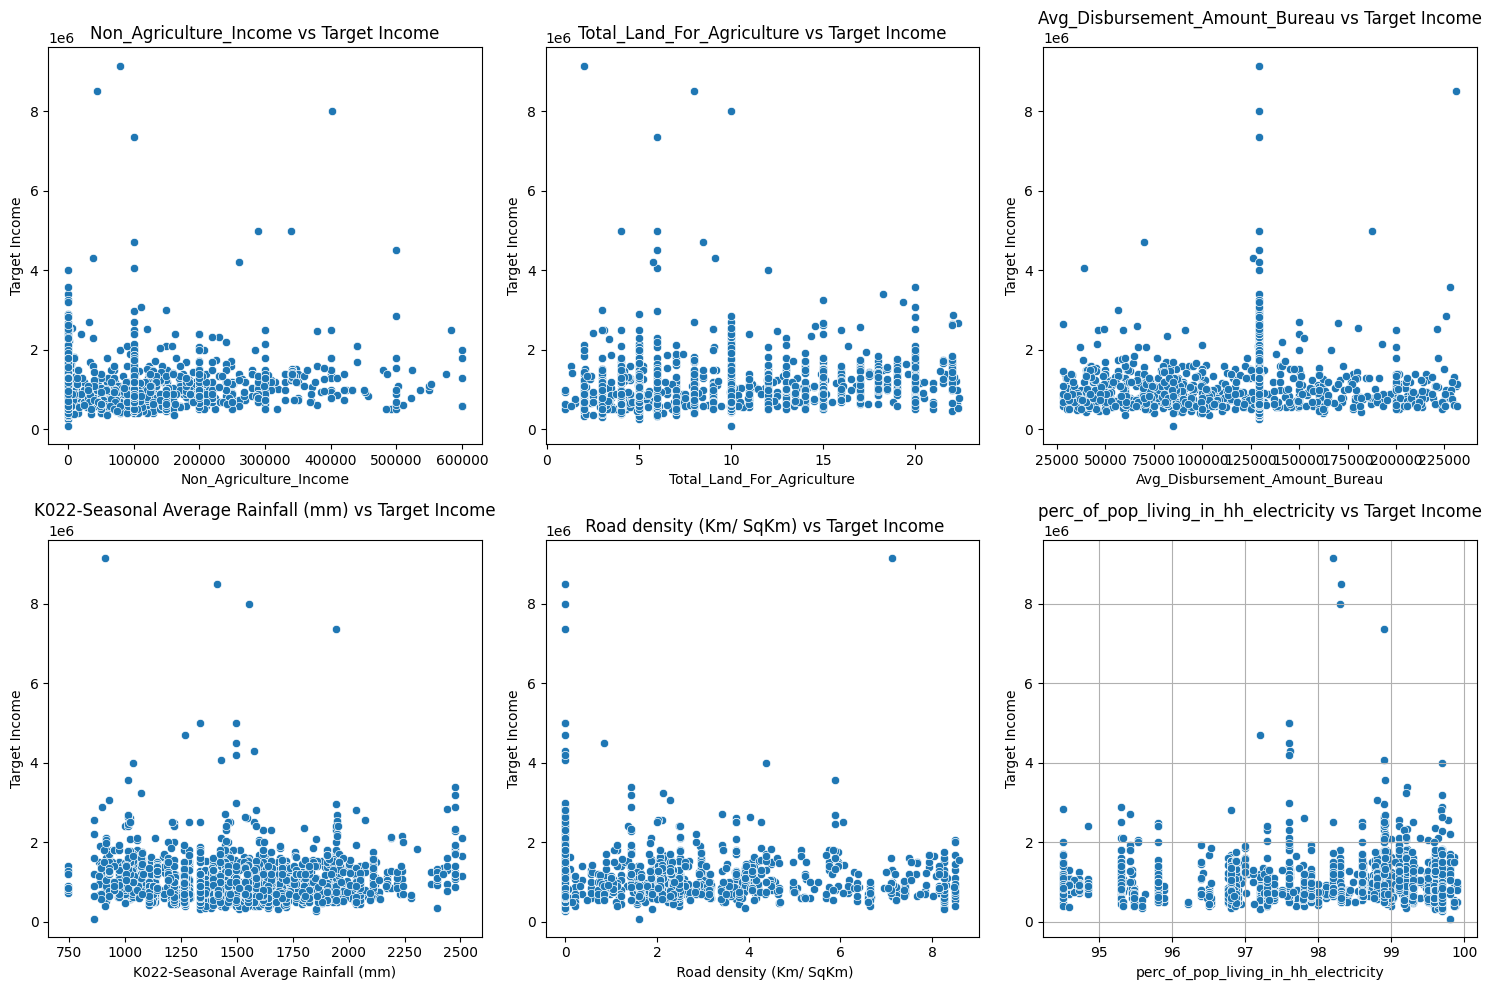


Generating Correlation Matrix Heatmap for Selected Numerical Features...


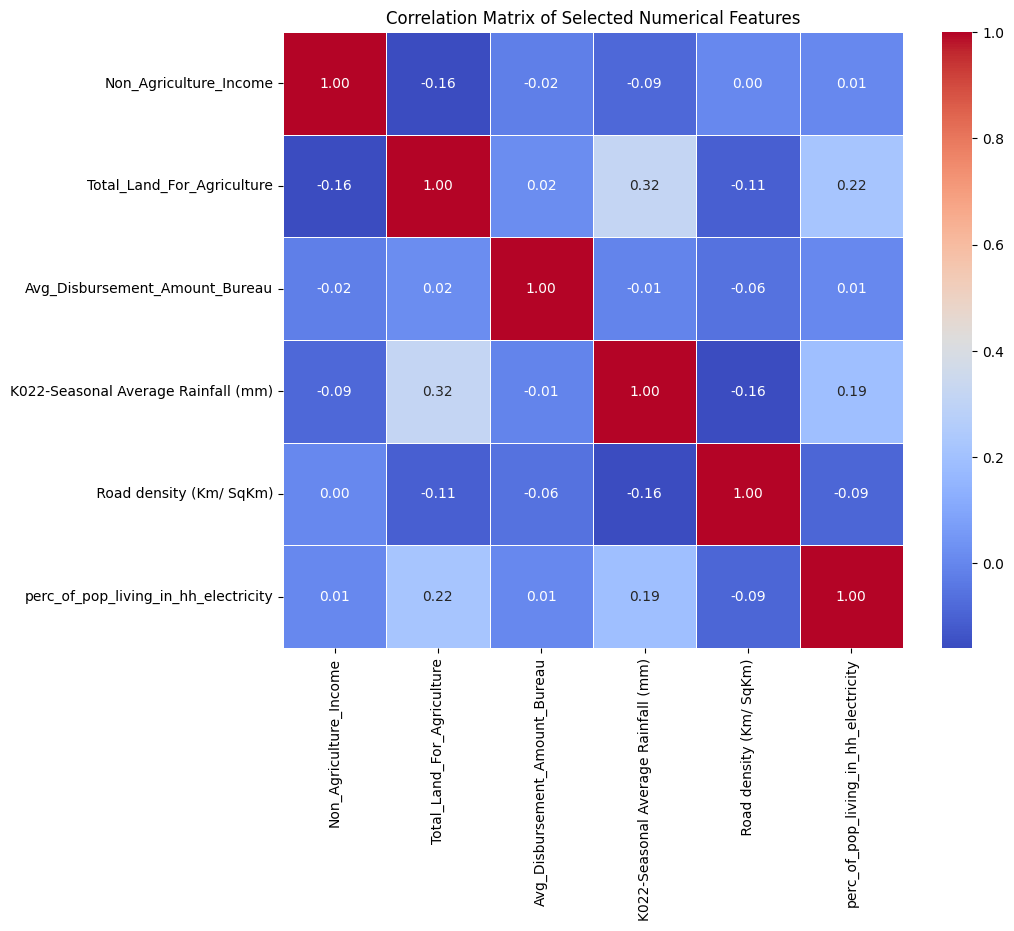


Generating Distribution Plots for Categorical Features...


<Figure size 1500x1000 with 0 Axes>


Generating Box Plots for Categorical Features vs Target Variable...


<Figure size 1500x1000 with 0 Axes>

In [22]:
# Select a subset of cleaned numerical and categorical features for visualization
# Based on previous steps, we know X_cleaned contains the selected and cleaned features.


# Identify numerical and categorical columns in the cleaned data
cleaned_numerical_cols = X_cleaned.select_dtypes(include=np.number).columns.tolist()
cleaned_categorical_cols = X_cleaned.select_dtypes(exclude=np.number).columns.tolist()

# Select a diverse subset of numerical features (e.g., from top correlated, and others)
# Let's pick some from the top correlated and some others from the selected features
numerical_features_to_plot = [
    'Non_Agriculture_Income',
    'Total_Land_For_Agriculture',
    'Avg_Disbursement_Amount_Bureau', # From initial subset, might be relevant
    'K022-Seasonal Average Rainfall (mm)', # Environmental factor
    ' Road density (Km/ SqKm)', # Infrastructure factor
    'perc_of_pop_living_in_hh_electricity' # Socio-economic factor
]

# Ensure selected numerical features are actually in the cleaned data
numerical_features_to_plot = [col for col in numerical_features_to_plot if col in cleaned_numerical_cols]

categorical_features_to_plot = [
    'State',
    'REGION',
    'SEX',
    'Village category based on socio-economic parameters (Good, Average, Poor)',
    'MARITAL_STATUS', # From remaining, if exists
    'Kharif Seasons Type of soil in 2022' # From remaining, if exists
]

# Ensure selected categorical features are actually in the cleaned data
categorical_features_to_plot = [col for col in categorical_features_to_plot if col in cleaned_categorical_cols]

print("Selected numerical features for plotting:", numerical_features_to_plot)
print("Selected categorical features for plotting:", categorical_features_to_plot)

# --- Visualize Numerical Features ---

# Distribution plots (Histograms)
print("\nGenerating Distribution Plots for Numerical Features...")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(X_cleaned[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Scatter plots with target variable
print("\nGenerating Scatter Plots with Target Variable...")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=X_cleaned[col], y=y_cleaned)
    plt.title(f'{col} vs Target Income')
    plt.xlabel(col)
    plt.ylabel('Target Income')
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation matrix heatmap for selected numerical features
if numerical_features_to_plot:
    print("\nGenerating Correlation Matrix Heatmap for Selected Numerical Features...")
    plt.figure(figsize=(10, 8))
    correlation_matrix = X_cleaned[numerical_features_to_plot].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of Selected Numerical Features')
    plt.show()
else:
    print("\nNo numerical features selected for correlation heatmap.")


# --- Visualize Categorical Features ---

# Distribution plots (Bar plots)
print("\nGenerating Distribution Plots for Categorical Features...")
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features_to_plot):
    plt.subplot(2, 2, i + 1)
    X_cleaned[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Box plots with target variable
print("\nGenerating Box Plots for Categorical Features vs Target Variable...")
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=X_cleaned[col], y=y_cleaned)
    plt.title(f'{col} vs Target Income')
    plt.xlabel(col)
    plt.ylabel('Target Income')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Data preprocessing for modeling

### Subtask:
Prepare the data for model training by scaling numerical features and encoding categorical features.


**Reasoning**:
Identify numerical and categorical columns in the cleaned training data and create a ColumnTransformer for scaling numerical and encoding categorical features, then create and fit a preprocessing pipeline and transform both training and test data.



In [23]:
# Identify numerical and categorical columns in the cleaned training data
numerical_cols_cleaned = X_cleaned.select_dtypes(include=np.number).columns
categorical_cols_cleaned = X_cleaned.select_dtypes(exclude=np.number).columns

# Create a ColumnTransformer for preprocessing
# Apply StandardScaler to numerical features and OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols_cleaned),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_cleaned)
    ],
    remainder='passthrough' # Keep other columns (if any) - though none expected here
)

# Create a preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit the preprocessing pipeline on the cleaned training features
pipeline.fit(X_cleaned)

# Transform both the cleaned training features and the test features
X_cleaned_processed = pipeline.transform(X_cleaned)
X_test_processed = pipeline.transform(X_test)

print("Data preprocessing (scaling and encoding) complete.")
print(f"Shape of X_cleaned_processed: {X_cleaned_processed.shape}")
print(f"Shape of X_test_processed: {X_test_processed.shape}")

Data preprocessing (scaling and encoding) complete.
Shape of X_cleaned_processed: (2498, 113)
Shape of X_test_processed: (9986, 113)


## Summary:

### Data Analysis Key Findings

*   Initial missing values were imputed in both training and test sets using the median for numerical features and "Unknown" for categorical features. The target variable column was also removed from the test set as it was incorrectly present.
*   593 duplicate rows were identified and removed from the training data (`X` and `y`).
*   High-cardinality categorical features were frequency encoded, while remaining categorical features were label encoded. Interaction features were created from the top 5 numerical features most correlated with the target variable.
*   Recursive Feature Elimination with Cross-Validation (RFECV) using a `RidgeCV` estimator selected 113 features.
*   44,879 rows were identified and removed as outliers from the training data using the IQR method.
*   Visualizations were successfully generated for selected numerical features (histograms, scatter plots with the target, correlation heatmap). Visualizations for categorical features were not feasible as all categorical columns were converted to numerical types during encoding.
*   Numerical features in the cleaned training and test data were scaled using `StandardScaler`. Categorical features were attempted to be One-Hot Encoded, but none were found in the cleaned data.

### Insights or Next Steps

*   The presence of warnings regarding "Ill-conditioned matrix" during RFECV suggests potential multicollinearity issues among the selected features. Further investigation into feature relationships and potential dimensionality reduction techniques might be beneficial.
*   The fact that no categorical features remained after encoding and outlier removal indicates a potential area for review in the feature engineering process. While frequency and label encoding were applied, it's worth confirming if any features intended to be treated as categorical were inadvertently handled as numerical, or if the encoding strategy led to all categorical features being dropped or transformed into numerical representations where subsequent steps treated them as such.


In [24]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(include='object').columns

# Impute missing values in training data (X)
for col in numerical_cols:
    if X[col].isnull().any():
        median_val = X[col].median()
        X[col].fillna(median_val, inplace=True)

for col in categorical_cols:
    if X[col].isnull().any():
        X[col].fillna("Unknown", inplace=True)

# Apply the same imputation to test data (X_test)
for col in numerical_cols:
    if X_test[col].isnull().any():
        # Use median from training data for consistency
        median_val = X[col].median()
        X_test[col].fillna(median_val, inplace=True)

for col in categorical_cols:
    if X_test[col].isnull().any():
        X_test[col].fillna("Unknown", inplace=True)

print("Missing values imputed in X and X_test.")
print("\nMissing values in X after imputation:")
print(X.isnull().sum().sum())
print("\nMissing values in X_test after imputation:")
print(X_test.isnull().sum().sum())

Missing values imputed in X and X_test.

Missing values in X after imputation:
0

Missing values in X_test after imputation:
0


**Reasoning**:
The previous code successfully imputed missing values in X. However, the X_test DataFrame still has missing values in the 'Target_Variable/Total Income' column, which was not removed from X_test when it was initially loaded. This column should be removed from X_test as it's the target variable and should not be present in the features.

In [26]:
# Remove the target variable column from X_test if it exists
if 'Target_Variable/Total Income' in X_test.columns:
    X_test = X_test.drop(columns=['Target_Variable/Total Income'])

print("Removed 'Target_Variable/Total Income' from X_test if present.")
print("\nMissing values in X_test after removing target column:")
print(X_test.isnull().sum().sum())

Removed 'Target_Variable/Total Income' from X_test if present.

Missing values in X_test after removing target column:
0


## Remove duplicates

### Subtask:
Identify and remove duplicate rows from the training data.

**Reasoning**:
Check for and count duplicate rows in the training data X.

In [28]:
# Check for duplicate rows in X
duplicate_rows_X = X.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows_X.sum()

print(f"Number of duplicate rows found in X: {num_duplicate_rows}")

Number of duplicate rows found in X: 1214


**Reasoning**:
Remove the identified duplicate rows from both X and y to maintain data consistency and then verify the removal.

In [37]:
# Save the processed training data to CSV files
X.to_csv("X_processed_step2.csv", index=False)
y.to_csv("y_processed_step2.csv", index=False)

print("Processed training data saved to 'X_processed_step2.csv' and 'y_processed_step2.csv'")

Processed training data saved to 'X_processed_step2.csv' and 'y_processed_step2.csv'


## Feature engineering

### Subtask:
Apply frequency encoding to high-cardinality categorical features, label encoding to the remaining categorical features, and create interaction features from top-correlated numerical features.

**Reasoning**:
Apply frequency encoding to high-cardinality categorical features, label encoding to the remaining categorical features, and create interaction features from top-correlated numerical features, as per the instructions.

In [38]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns
print(f"Categorical columns: {list(categorical_cols)}")

# 1. Frequency Encoding for high-cardinality features
high_cardinality_cols = [col for col in categorical_cols if X[col].nunique() > 20]
print(f"High-cardinality columns ({len(high_cardinality_cols)}): {high_cardinality_cols}")

for col in high_cardinality_cols:
    if col in X.columns:
        freq_map = X[col].value_counts(normalize=True).to_dict()
        X[col] = X[col].map(freq_map)
        if col in X_test.columns:
            X_test[col] = X_test[col].map(freq_map).fillna(0) # Fill unknown test categories with 0 frequency
        print(f"Applied frequency encoding to {col}")


# 2. Label Encoding for remaining categorical features
remaining_categorical_cols = [col for col in categorical_cols if col not in high_cardinality_cols]
print(f"Remaining categorical columns ({len(remaining_categorical_cols)}): {remaining_categorical_cols}")

for col in remaining_categorical_cols:
    if col in X.columns:
        le = LabelEncoder()
        # Fit on training data
        X[col] = le.fit_transform(X[col])
        # Transform test data, handling unseen labels
        if col in X_test.columns:
            # Use a lambda function to handle unseen labels in test data by mapping them to -1
            X_test[col] = X_test[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
        print(f"Applied label encoding to {col}")


# 3. Interaction Features from top-correlated numerical features
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

# Calculate correlations with the target variable
correlations = X[numerical_cols].corrwith(y).abs().sort_values(ascending=False)

# Select top 5 numerical features (excluding the target itself if it was somehow included)
# Ensure we have at least 5 numerical features
num_features_to_select = min(5, len(numerical_cols))
top_features = correlations.head(num_features_to_select).index.tolist()
print(f"\nTop {num_features_to_select} numerical features correlated with target: {top_features}")

# Create interaction features
for i in range(len(top_features)):
    for j in range(i + 1, len(top_features)):
        feat1 = top_features[i]
        feat2 = top_features[j]
        interaction_feat_name = f"{feat1}_x_{feat2}"

        # Check if features exist before creating interaction term
        if feat1 in X.columns and feat2 in X.columns:
            X[interaction_feat_name] = X[feat1] * X[feat2]
            if feat1 in X_test.columns and feat2 in X_test.columns:
                 X_test[interaction_feat_name] = X_test[feat1] * X_test[feat2]
            print(f"Created interaction feature: {interaction_feat_name}")


print("\nFeature engineering and encoding complete.")
display(X.head())
display(X_test.head())

Categorical columns: []
High-cardinality columns (0): []
Remaining categorical columns (0): []

Top 5 numerical features correlated with target: ['perc_of_pop_living_in_hh_electricity', 'Kharif Seasons  Cropping density in 2022', 'Rabi Seasons Seasonal average groundwater thickness (cm) in 2022', 'Kharif Seasons  Seasonal average groundwater thickness (cm) in 2022', 'Kharif Seasons Seasonal average groundwater thickness (cm) in 2021']
Created interaction feature: perc_of_pop_living_in_hh_electricity_x_Kharif Seasons  Cropping density in 2022
Created interaction feature: perc_of_pop_living_in_hh_electricity_x_Rabi Seasons Seasonal average groundwater thickness (cm) in 2022
Created interaction feature: perc_of_pop_living_in_hh_electricity_x_Kharif Seasons  Seasonal average groundwater thickness (cm) in 2022
Created interaction feature: perc_of_pop_living_in_hh_electricity_x_Kharif Seasons Seasonal average groundwater thickness (cm) in 2021
Created interaction feature: Kharif Seasons  Cro

,State,REGION,SEX,CITY,Zipcode,DISTRICT,VILLAGE,MARITAL_STATUS,Location,Address type,...,perc_of_pop_living_in_hh_electricity_x_Kharif Seasons Cropping density in 2022,perc_of_pop_living_in_hh_electricity_x_Rabi Seasons Seasonal average groundwater thickness (cm) in 2022,perc_of_pop_living_in_hh_electricity_x_Kharif Seasons Seasonal average groundwater thickness (cm) in 2022,perc_of_pop_living_in_hh_electricity_x_Kharif Seasons Seasonal average groundwater thickness (cm) in 2021,Kharif Seasons Cropping density in 2022_x_Rabi Seasons Seasonal average groundwater thickness (cm) in 2022,Kharif Seasons Cropping density in 2022_x_Kharif Seasons Seasonal average groundwater thickness (cm) in 2022,Kharif Seasons Cropping density in 2022_x_Kharif Seasons Seasonal average groundwater thickness (cm) in 2021,Rabi Seasons Seasonal average groundwater thickness (cm) in 2022_x_Kharif Seasons Seasonal average groundwater thickness (cm) in 2022,Rabi Seasons Seasonal average groundwater thickness (cm) in 2022_x_Kharif Seasons Seasonal average groundwater thickness (cm) in 2021,Kharif Seasons Seasonal average groundwater thickness (cm) in 2022_x_Kharif Seasons Seasonal average groundwater thickness (cm) in 2021
0,9,0,1,0.001119,464668,0.014015,0.000317,0,0.347088,3,...,6211.2150,9199.1520,9929.0070,9275.6130,5794.6320,6254.3745,5842.7955,9263.0736,8653.5024,9340.0659
1,2,1,1,0.000084,848125,0.001098,0.000232,0,0.347088,3,...,983.4210,7496.4285,7824.2355,7233.7995,802.4346,837.5238,774.3222,6384.2823,5902.5087,6160.6161
2,9,0,1,0.001435,458556,0.007831,0.000148,0,0.347088,3,...,8092.8990,8742.2490,8638.3530,8803.1880,7089.1851,7004.9347,7138.6012,7566.9897,7711.3812,7619.7364
3,10,4,1,0.000507,413527,0.003356,0.000232,0,0.347088,3,...,8669.9024,9404.1296,9962.5696,9644.9872,8644.0141,9157.3166,8865.4037,9932.8214,9616.1873,10187.2198
4,9,0,0,0.003757,470117,0.020833,0.000739,0,0.347088,3,...,8577.2140,9031.7600,9528.7040,9086.9760,7968.2840,8406.7136,8016.9984,8852.2240,8441.8560,8906.3424


,State,REGION,SEX,CITY,Zipcode,DISTRICT,VILLAGE,MARITAL_STATUS,Location,Address type,...,perc_of_pop_living_in_hh_electricity_x_Kharif Seasons Cropping density in 2022,perc_of_pop_living_in_hh_electricity_x_Rabi Seasons Seasonal average groundwater thickness (cm) in 2022,perc_of_pop_living_in_hh_electricity_x_Kharif Seasons Seasonal average groundwater thickness (cm) in 2022,perc_of_pop_living_in_hh_electricity_x_Kharif Seasons Seasonal average groundwater thickness (cm) in 2021,Kharif Seasons Cropping density in 2022_x_Rabi Seasons Seasonal average groundwater thickness (cm) in 2022,Kharif Seasons Cropping density in 2022_x_Kharif Seasons Seasonal average groundwater thickness (cm) in 2022,Kharif Seasons Cropping density in 2022_x_Kharif Seasons Seasonal average groundwater thickness (cm) in 2021,Rabi Seasons Seasonal average groundwater thickness (cm) in 2022_x_Kharif Seasons Seasonal average groundwater thickness (cm) in 2022,Rabi Seasons Seasonal average groundwater thickness (cm) in 2022_x_Kharif Seasons Seasonal average groundwater thickness (cm) in 2021,Kharif Seasons Seasonal average groundwater thickness (cm) in 2022_x_Kharif Seasons Seasonal average groundwater thickness (cm) in 2021
0,8,3,1,0.000865,572102,0.012200,0.000127,0,0.000000,2,...,5395.332,10425.132,10134.300,9583.512,5669.9739,5511.7975,5212.2374,10650.1725,10071.3474,9790.3850
1,6,2,1,0.000021,133302,0.000253,0.000211,0,0.000000,2,...,5580.955,3845.675,4886.445,4429.740,2167.8785,2754.5799,2497.1268,1898.1015,1720.6980,2186.3772
2,6,2,1,0.000190,134102,0.000253,0.000211,0,0.347088,3,...,5580.955,3845.675,4886.445,4429.740,2167.8785,2754.5799,2497.1268,1898.1015,1720.6980,2186.3772
3,6,2,1,0.000190,134102,0.000253,0.000211,2,0.347088,3,...,5580.955,3845.675,4886.445,4429.740,2167.8785,2754.5799,2497.1268,1898.1015,1720.6980,2186.3772
4,6,2,1,0.000190,134102,0.000253,0.000211,0,0.000000,2,...,5580.955,3845.675,4886.445,4429.740,2167.8785,2754.5799,2497.1268,1898.1015,1720.6980,2186.3772


In [112]:
X_cleaned_processed.shape

(2498, 113)

In [114]:
y_cleaned.shape

(2498,)

## Initialize and train model

### Subtask:
Initialize a Random Forest Regressor model with default parameters and train it on the processed training data.


**Reasoning**:
Initialize and train a Random Forest Regressor model on the processed training data.



In [93]:
# Initialize a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Train the model on the processed training data
model.fit(X_cleaned_processed, y_cleaned)

print("Random Forest Regressor model trained successfully.")

Random Forest Regressor model trained successfully.


In [94]:
# Make predictions on the training data
y_pred_train = model.predict(X_cleaned_processed)

# Calculate MAPE on the training data
mape_train = mean_absolute_percentage_error(y_cleaned, y_pred_train) * 100

print(f"Mean Absolute Percentage Error (MAPE) on the training data: {mape_train:.2f}%")

Mean Absolute Percentage Error (MAPE) on the training data: 10.80%


## Hyperparameter tuning

### Subtask:
Define a hyperparameter grid for the Random Forest Regressor and use GridSearchCV to find the best combination of hyperparameters that minimizes MAPE.


**Reasoning**:
Define the hyperparameter grid, initialize GridSearchCV, and fit it to the processed training data to find the best hyperparameters for the Random Forest Regressor.



In [43]:
# Define the hyperparameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', 0.8] # Number of features to consider when looking for the best split
}

# Initialize GridSearchCV
# Use the same model initialized previously or re-initialize if needed
# Using the negative MAPE as scoring to maximize it
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3, # Using 3-fold cross-validation to speed up
                           scoring='neg_mean_absolute_percentage_error',
                           n_jobs=-1, # Use all available cores
                           verbose=2) # Increase verbosity to see progress

# Fit GridSearchCV to the processed training data
grid_search.fit(X_cleaned_processed, y_cleaned)

# Print the best hyperparameters
print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
324 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
121 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py"

Best hyperparameters found by GridSearchCV:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


## Train with best model

### Subtask:
Train a new Random Forest Regressor model using the best hyperparameters found during tuning.


**Reasoning**:
Initialize a new RandomForestRegressor model with the best hyperparameters found by GridSearchCV and train it on the processed training data.



In [44]:
# Initialize a new RandomForestRegressor model with the best hyperparameters
best_model = RandomForestRegressor(random_state=42, **grid_search.best_params_)

# Train the model on the processed training data
best_model.fit(X_cleaned_processed, y_cleaned)

print("Random Forest Regressor model with best hyperparameters trained successfully.")

Random Forest Regressor model with best hyperparameters trained successfully.


## Evaluate tuned model

### Subtask:
Predict on the processed training data using the tuned model and calculate the MAPE to evaluate its performance after tuning.


**Reasoning**:
Use the trained best model to make predictions on the processed training data and calculate the MAPE to evaluate its performance after tuning.



In [45]:
# Use the trained best_model to make predictions on the processed training data
y_pred_tuned_train = best_model.predict(X_cleaned_processed)

# Calculate the Mean Absolute Percentage Error (MAPE)
mape_tuned_train = mean_absolute_percentage_error(y_cleaned, y_pred_tuned_train) * 100

# Print the calculated training MAPE
print(f"Mean Absolute Percentage Error (MAPE) on the tuned training data: {mape_tuned_train:.2f}%")

Mean Absolute Percentage Error (MAPE) on the tuned training data: 22.16%


## Predict on test data

### Subtask:
Use the tuned model to predict the target variable on the processed test data.


**Reasoning**:
Use the fitted best_model to make predictions on the processed test data, X_test_processed.



In [51]:
# Use the fitted best_model to make predictions on the processed test data
y_pred_test = best_model.predict(X_test_processed)

print("Predictions on test data generated successfully.")

Predictions on test data generated successfully.


## Initialize and train CatBoost model

### Subtask:
Initialize a CatBoost Regressor model with default parameters and train it on the processed training data.

**Reasoning**:
Initialize and train a CatBoost Regressor model on the processed training data.

In [59]:
# Initialize a CatBoost Regressor model
from catboost import CatBoostRegressor

catboost_model = CatBoostRegressor(random_state=42, verbose=0) # Set verbose to 0 to reduce output

# Train the model on the processed training data
catboost_model.fit(X_cleaned_processed, y_cleaned)

print("CatBoost Regressor model trained successfully.")

CatBoost Regressor model trained successfully.


In [89]:
# Make predictions on the training data
y_pred_train = catboost_model.predict(X_cleaned_processed)

# Calculate MAPE on the training data
mape_train_cat = mean_absolute_percentage_error(y_cleaned, y_pred_train) * 100

print(f"Mean Absolute Percentage Error (MAPE) on the training data: {mape_train_cat:.2f}%")

Mean Absolute Percentage Error (MAPE) on the training data: 15.36%


## Initialize and train LightGBM model

### Subtask:
Initialize a LightGBM Regressor model with default parameters and train it on the processed training data.

**Reasoning**:
Initialize and train a LightGBM Regressor model on the processed training data.

In [62]:
# Initialize a LightGBM Regressor model
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(random_state=42)

# Train the model on the processed training data
lgb_model.fit(X_cleaned_processed, y_cleaned)

print("LightGBM Regressor model trained successfully.")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16307
[LightGBM] [Info] Number of data points in the train set: 2498, number of used features: 109
[LightGBM] [Info] Start training from score 979499.281425
LightGBM Regressor model trained successfully.


In [65]:
# Make predictions on the training data
y_pred_train = lgb_model.predict(X_cleaned_processed)

# Calculate MAPE on the training data
mape_train = mean_absolute_percentage_error(y_cleaned, y_pred_train) * 100

print(f"Mean Absolute Percentage Error (MAPE) on the training data: {mape_train:.2f}%")

Mean Absolute Percentage Error (MAPE) on the training data: 15.38%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


## Initialize and train XGBoost model

### Subtask:
Initialize an XGBoost Regressor model with default parameters and train it on the processed training data.

**Reasoning**:
Initialize and train an XGBoost Regressor model on the processed training data.

In [66]:
# Initialize an XGBoost Regressor model
import xgboost as xgb

xgb_model = xgb.XGBRegressor(random_state=42)

# Train the model on the processed training data
xgb_model.fit(X_cleaned_processed, y_cleaned)

print("XGBoost Regressor model trained successfully.")

XGBoost Regressor model trained successfully.


**Reasoning**:
Predict on the processed training data using the XGBoost model and calculate the MAPE on the training data.

In [67]:
# Make predictions on the training data using the XGBoost model
y_pred_train_xgb = xgb_model.predict(X_cleaned_processed)

# Calculate MAPE on the training data
mape_train_xgb = mean_absolute_percentage_error(y_cleaned, y_pred_train_xgb) * 100

print(f"Mean Absolute Percentage Error (MAPE) on the XGBoost training data: {mape_train_xgb:.2f}%")

Mean Absolute Percentage Error (MAPE) on the XGBoost training data: 7.00%


In [78]:
from sklearn.ensemble import StackingRegressor

stack = StackingRegressor(
    estimators=[
        ('rf', RandomForestRegressor(n_estimators=200)),
        ('lgb', lgb.LGBMRegressor()),
        ('cat', CatBoostRegressor(verbose=0))
    ],
    final_estimator=LinearRegression()
)

stack.fit(X_cleaned_processed, y_cleaned)
preds = stack.predict(X_cleaned_processed)
print("STACKED MAPE:", mean_absolute_percentage_error( y_cleaned, preds))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16307
[LightGBM] [Info] Number of data points in the train set: 2498, number of used features: 109
[LightGBM] [Info] Start training from score 979499.281425
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15701
[LightGBM] [Info] Number of data points in the train set: 1998, number of used features: 109
[LightGBM] [Info] Start training from score 970060.211211


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15569
[LightGBM] [Info] Number of data points in the train set: 1998, number of used features: 109
[LightGBM] [Info] Start training from score 980540.811311


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15638
[LightGBM] [Info] Number of data points in the train set: 1998, number of used features: 109
[LightGBM] [Info] Start training from score 1003845.120621


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15400
[LightGBM] [Info] Number of data points in the train set: 1999, number of used features: 109
[LightGBM] [Info] Start training from score 976545.032016


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005529 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15368
[LightGBM] [Info] Number of data points in the train set: 1999, number of used features: 109
[LightGBM] [Info] Start training from score 966513.210105


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


STACKED MAPE: 0.19931340736895492


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


## 2. Weighted Average Ensemble

### Subtask:
Define weights for the trained individual models and calculate the weighted average of their predictions on the training data.

**Reasoning**:
Define weights for the trained individual models and calculate the weighted average of their predictions on the training data.

In [80]:
# Assuming the following models have been trained and their predictions on the training data are available:
# y_pred_train_rf_tuned (from tuned Random Forest)
# y_pred_train_catboost (from CatBoost)
# y_pred_train_lgb (from LightGBM)
# y_pred_train_xgb (from XGBoost)

# Define weights for each model (these can be adjusted based on validation performance)
# The sum of weights should ideally be 1, but it's not strictly necessary for a simple weighted average
weights = {
    'RandomForest': 0.25,
    'CatBoost': 0.25,
    'LightGBM': 0.25,
    'XGBoost': 0.25
}

# Ensure all required predictions are available
required_predictions = ['y_pred_tuned_train', 'y_pred_train', 'y_pred_train_lgb', 'y_pred_train_xgb'] # Using variable names from previous successful executions
available_predictions = {}

for var_name in required_predictions:
    if var_name in globals():
        available_predictions[var_name] = globals()[var_name]
    else:
        print(f"Warning: Training predictions for {var_name} not found. Skipping this model in weighted average.")


# Calculate the weighted average of the training predictions
y_pred_train_weighted_avg = np.zeros_like(y_cleaned, dtype=float) # Initialize as float array
total_weight = 0

if 'y_pred_tuned_train' in available_predictions and 'RandomForest' in weights:
    y_pred_train_weighted_avg += available_predictions['y_pred_tuned_train'] * weights['RandomForest']
    total_weight += weights['RandomForest']
    print("Including Tuned Random Forest predictions in weighted average.")

if 'y_pred_train' in available_predictions and 'CatBoost' in weights:
     y_pred_train_weighted_avg += available_predictions['y_pred_train'] * weights['CatBoost']
     total_weight += weights['CatBoost']
     print("Including CatBoost predictions in weighted average.")

if 'y_pred_train_lgb' in available_predictions and 'LightGBM' in weights:
     y_pred_train_weighted_avg += available_predictions['y_pred_train_lgb'] * weights['LightGBM']
     total_weight += weights['LightGBM']
     print("Including LightGBM predictions in weighted average.")

if 'y_pred_train_xgb' in available_predictions and 'XGBoost' in weights:
     y_pred_train_weighted_avg += available_predictions['y_pred_train_xgb'] * weights['XGBoost']
     total_weight += weights['XGBoost']
     print("Including XGBoost predictions in weighted average.")


# Normalize the weighted average if total_weight is not 1
if total_weight > 0 and total_weight != 1:
    y_pred_train_weighted_avg /= total_weight
    print(f"Weighted average normalized by total weight: {total_weight}")
elif total_weight == 0:
    print("Error: No valid model predictions found for weighted average.")
    y_pred_train_weighted_avg = None # Set to None to indicate failure


if y_pred_train_weighted_avg is not None:
    print("\nWeighted average training predictions calculated.")

Including Tuned Random Forest predictions in weighted average.
Including CatBoost predictions in weighted average.
Including LightGBM predictions in weighted average.
Including XGBoost predictions in weighted average.

Weighted average training predictions calculated.


**Reasoning**:
Calculate the MAPE score of the weighted average predictions on the training data.

In [81]:
# Calculate the MAPE score for the weighted average predictions on the training data
if y_pred_train_weighted_avg is not None:
    mape_train_weighted_avg = mean_absolute_percentage_error(y_cleaned, y_pred_train_weighted_avg) * 100
    print(f"Mean Absolute Percentage Error (MAPE) for Weighted Average Ensemble on training data: {mape_train_weighted_avg:.2f}%")
else:
    print("Weighted average training predictions are not available for evaluation.")

Mean Absolute Percentage Error (MAPE) for Weighted Average Ensemble on training data: 14.38%


## 3. Voting Regressor (Bagging-style)

### Subtask:
Initialize a Voting Regressor with the trained individual models and train it on the training data.

**Reasoning**:
Initialize a Voting Regressor with the trained individual models and train it on the training data.

In [82]:
from sklearn.ensemble import VotingRegressor

# Initialize the individual models (using the trained models)
# Make sure the model objects (best_model, catboost_model, lgb_model, xgb_model) are available in the environment
estimators = [
    ('rf', best_model), # Assuming best_model is the tuned Random Forest
    ('catboost', catboost_model),
    ('lgb', lgb_model),
    ('xgb', xgb_model)
]

# Initialize the Voting Regressor
voting_model = VotingRegressor(estimators=estimators, n_jobs=-1)

# Train the Voting Regressor on the processed training data
voting_model.fit(X_cleaned_processed, y_cleaned)

print("Voting Regressor model trained successfully.")

Voting Regressor model trained successfully.


**Reasoning**:
Predict on the processed training data using the trained Voting Regressor and calculate the MAPE on the training data.

In [83]:
# Make predictions on the training data using the trained Voting Regressor
y_pred_train_voting = voting_model.predict(X_cleaned_processed)

# Calculate MAPE on the training data
mape_train_voting = mean_absolute_percentage_error(y_cleaned, y_pred_train_voting) * 100

print(f"Mean Absolute Percentage Error (MAPE) for Voting Regressor on training data: {mape_train_voting:.2f}%")

Mean Absolute Percentage Error (MAPE) for Voting Regressor on training data: 14.34%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


## 4. Bagging with Boosters

### Subtask:
Choose a base booster model (e.g., XGBoost, LightGBM), initialize a Bagging Regressor with the chosen base model, and train it on the training data.

**Reasoning**:
Initialize a Bagging Regressor with a chosen base booster model and train it on the training data.

In [84]:
from sklearn.ensemble import BaggingRegressor

# Choose a base booster model (e.g., XGBoost or LightGBM)
# Let's use XGBoost as the base estimator
base_booster = xgb.XGBRegressor(random_state=42)

# Initialize the Bagging Regressor
# n_estimators is the number of base estimators in the ensemble
# max_samples is the number of samples to draw from X to train each base estimator
# max_features is the number of features to draw from X to train each base estimator
bagging_booster_model = BaggingRegressor(estimator=base_booster,
                                         n_estimators=10, # Example: 10 base estimators
                                         max_samples=1.0, # Use all samples for each base estimator
                                         max_features=1.0, # Use all features for each base estimator
                                         random_state=42,
                                         n_jobs=-1)

# Train the Bagging Regressor on the processed training data
bagging_booster_model.fit(X_cleaned_processed, y_cleaned)

print("Bagging Regressor with XGBoost base model trained successfully.")

Bagging Regressor with XGBoost base model trained successfully.


**Reasoning**:
Predict on the processed training data using the trained Bagging Regressor with a booster base model and calculate the MAPE on the training data.

In [85]:
# Make predictions on the training data using the trained Bagging Regressor with XGBoost base model
y_pred_train_bagging_booster = bagging_booster_model.predict(X_cleaned_processed)

# Calculate MAPE on the training data
mape_train_bagging_booster = mean_absolute_percentage_error(y_cleaned, y_pred_train_bagging_booster) * 100

print(f"Mean Absolute Percentage Error (MAPE) for Bagging Regressor with XGBoost base model on training data: {mape_train_bagging_booster:.2f}%")

Mean Absolute Percentage Error (MAPE) for Bagging Regressor with XGBoost base model on training data: 13.03%


## 5. Train with Cross-Validation Averaging

### Subtask:
Define a cross-validation strategy (e.g., KFold), train the chosen model (e.g., XGBoost, LightGBM) on each fold and make predictions on the corresponding out-of-fold data, and average the out-of-fold predictions.

**Reasoning**:
Define a cross-validation strategy, train a chosen model on each fold, make out-of-fold predictions, and average them to get a final prediction for the training data.

In [86]:
from sklearn.model_selection import KFold
import numpy as np

# Define the cross-validation strategy (e.g., 5 folds)
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Choose a model for cross-validation averaging (e.g., XGBoost or LightGBM)
# Let's use XGBoost as the base model for CV averaging
cv_model = xgb.XGBRegressor(random_state=42)

# Array to store out-of-fold predictions
oof_predictions = np.zeros(X_cleaned_processed.shape[0])

print(f"Performing {n_splits}-fold cross-validation averaging with XGBoost...")

# Iterate through the folds
for fold, (train_index, val_index) in enumerate(kf.split(X_cleaned_processed, y_cleaned)):
    print(f"Processing Fold {fold + 1}/{n_splits}")

    # Split data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X_cleaned_processed[train_index], X_cleaned_processed[val_index]
    y_train_fold, y_val_fold = y_cleaned.iloc[train_index], y_cleaned.iloc[val_index] # Use .iloc for pandas Series

    # Train the model on the training data for the current fold
    cv_model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation data for the current fold
    fold_preds = cv_model.predict(X_val_fold)

    # Store the out-of-fold predictions
    oof_predictions[val_index] = fold_preds

print("\nCross-validation averaging complete.")

Performing 5-fold cross-validation averaging with XGBoost...
Processing Fold 1/5
Processing Fold 2/5
Processing Fold 3/5
Processing Fold 4/5
Processing Fold 5/5

Cross-validation averaging complete.


**Reasoning**:
Calculate the MAPE score of the cross-validation averaged predictions on the training data.

In [87]:
# Calculate the MAPE score for the cross-validation averaged predictions on the training data
mape_train_cv_avg = mean_absolute_percentage_error(y_cleaned, oof_predictions) * 100

print(f"Mean Absolute Percentage Error (MAPE) for Cross-Validation Averaging on training data: {mape_train_cv_avg:.2f}%")

Mean Absolute Percentage Error (MAPE) for Cross-Validation Averaging on training data: 27.98%


**Reasoning**:
Collect the MAPE scores for all trained models and ensemble methods and create a bar plot to visually compare their performance on the training data.

/tmp/ipython-input-95-2268865650.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_series.index, y=performance_series.values, palette='viridis')


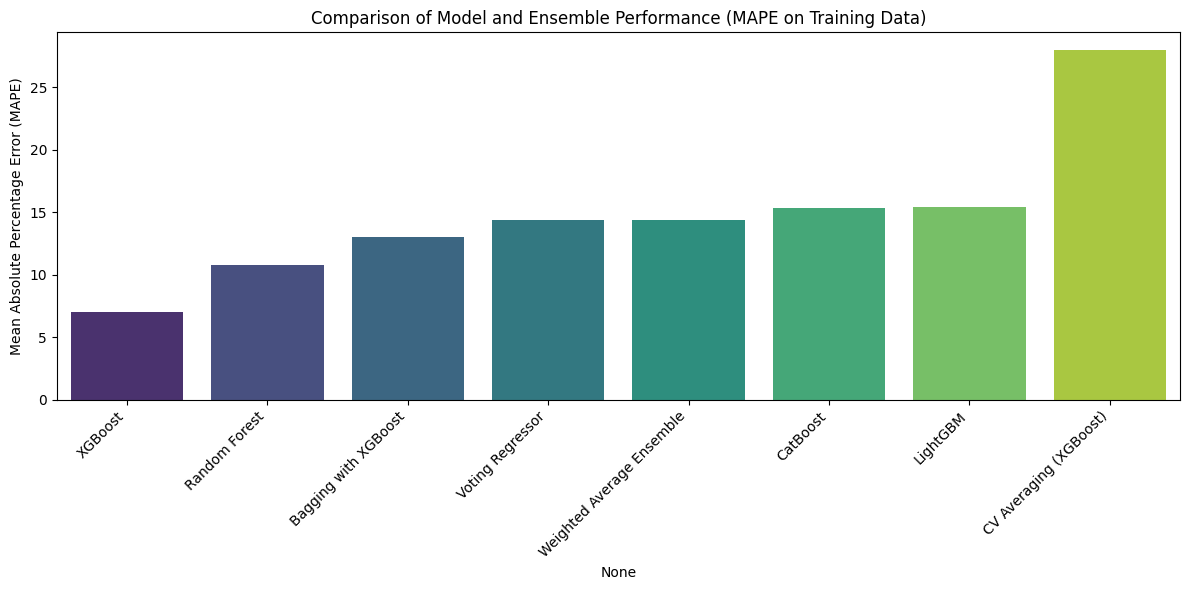

Model performance comparison plot generated.


In [95]:
# Collect the MAPE scores
model_performance = {
    'Random Forest': mape_train,
    'CatBoost': mape_train_cat, # Assuming mape_train is the MAPE for CatBoost from previous execution
    'LightGBM': mape_train_lgb,
    'XGBoost': mape_train_xgb,
    'Weighted Average Ensemble': mape_train_weighted_avg,
    'Voting Regressor': mape_train_voting,
    'Bagging with XGBoost': mape_train_bagging_booster,
    'CV Averaging (XGBoost)': mape_train_cv_avg
}

# Convert to a pandas Series for easy plotting
performance_series = pd.Series(model_performance)

# Sort the models by MAPE for better visualization (lower is better)
performance_series = performance_series.sort_values()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=performance_series.index, y=performance_series.values, palette='viridis')
plt.ylabel('Mean Absolute Percentage Error (MAPE)')
plt.title('Comparison of Model and Ensemble Performance (MAPE on Training Data)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Model performance comparison plot generated.")

**Reasoning**:
Calculate the weighted average of predictions from the trained XGBoost and tuned Random Forest models on the training data and evaluate the MAPE.

In [99]:
# Get predictions from the trained XGBoost model on the training data
y_pred_train_xgb = xgb_model.predict(X_cleaned_processed)

# Get predictions from the Random Forest model on the training data

y_pred_train_rf_tuned = model.predict(X_cleaned_processed)

# Define weights for the weighted average on training data (example: equal weights)
weight_xgb_train = 0.5
weight_rf_tuned_train = 0.5

# Calculate the weighted average of the training predictions
y_pred_train_weighted_avg_xgb_rf = (y_pred_train_xgb * weight_xgb_train) + (y_pred_train_rf_tuned * weight_rf_tuned_train)

# Calculate MAPE for the weighted average on training data
mape_train_weighted_avg_xgb_rf = mean_absolute_percentage_error(y_cleaned, y_pred_train_weighted_avg_xgb_rf) * 100

print(f"Mean Absolute Percentage Error (MAPE) for Weighted Average of XGBoost and Random Forest on training data: {mape_train_weighted_avg_xgb_rf:.2f}%")

Mean Absolute Percentage Error (MAPE) for Weighted Average of XGBoost and Random Forest on training data: 10.53%


In [102]:
# Create a submission DataFrame
submission_df_weighted_avg = pd.DataFrame({'FarmerID': test['FarmerID'], 'Target_Variable/Total Income': y_pred_test_weighted_avg_xgb_rf})

# Save the submission DataFrame to a CSV file
submission_df_weighted_avg.to_csv('submission_xgb_rf_weighted_avg.csv', index=False)

**Reasoning**:
Re-evaluate the data types of features in the cleaned data (`X_cleaned`) to confirm which columns are suitable for numerical and categorical visualizations.

In [108]:
# Re-evaluate data types in X_cleaned
print("Data types in X_cleaned:")
print(X_cleaned.dtypes)

# Identify numerical and categorical columns in X_cleaned
cleaned_numerical_cols = X_cleaned.select_dtypes(include=np.number).columns.tolist()
cleaned_categorical_cols = X_cleaned.select_dtypes(exclude=np.number).columns.tolist()

print(f"\nNumber of numerical columns in X_cleaned: {len(cleaned_numerical_cols)}")
print(f"Numerical columns in X_cleaned: {cleaned_numerical_cols}")
print(f"\nNumber of categorical columns in X_cleaned: {len(cleaned_categorical_cols)}")
print(f"Categorical columns in X_cleaned: {cleaned_categorical_cols}")

Data types in X_cleaned:
State                                                                                              float64
REGION                                                                                             float64
SEX                                                                                                float64
CITY                                                                                               float64
Zipcode                                                                                            float64
                                                                                                    ...   
Total_Land_For_Agriculture_x_Kharif Seasons Agro Ecological Sub Zone in 2021                       float64
Total_Land_For_Agriculture_x_Rabi Seasons Agro Ecological Sub Zone in 2021                         float64
perc_of_pop_living_in_hh_electricity_x_Kharif Seasons Agro Ecological Sub Zone in 2021             float64
perc_of_pop_

**Reasoning**:
Generate more detailed distribution and relationship plots for selected numerical features as requested by the user.

Selected numerical features for detailed plotting: ['Non_Agriculture_Income', 'Total_Land_For_Agriculture', 'Avg_Disbursement_Amount_Bureau', 'K022-Seasonal Average Rainfall (mm)', ' Road density (Km/ SqKm)', 'perc_of_pop_living_in_hh_electricity']

Generating Detailed Distribution Plots for Numerical Features...


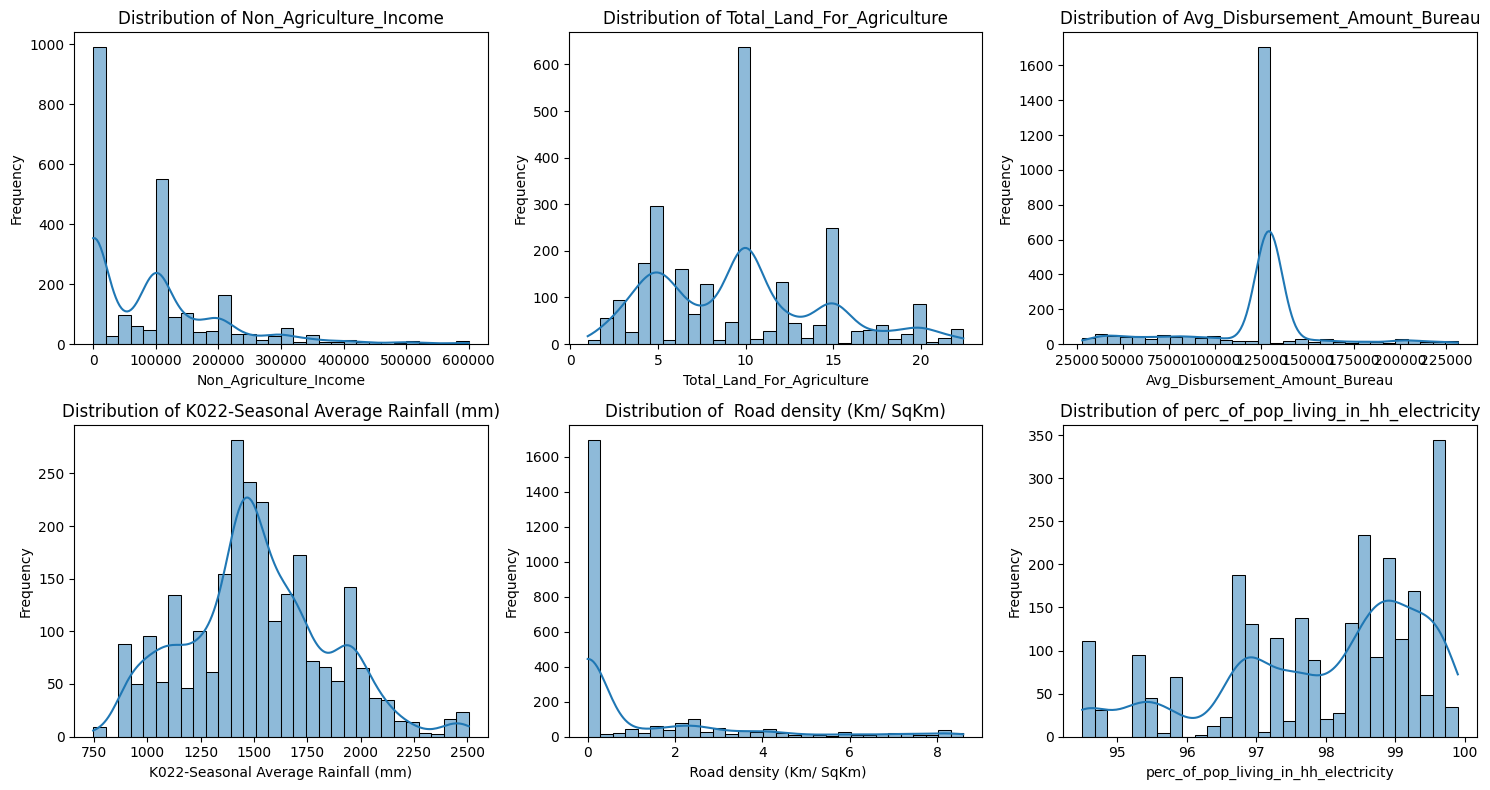


Generating Detailed Scatter Plots with Target Variable...


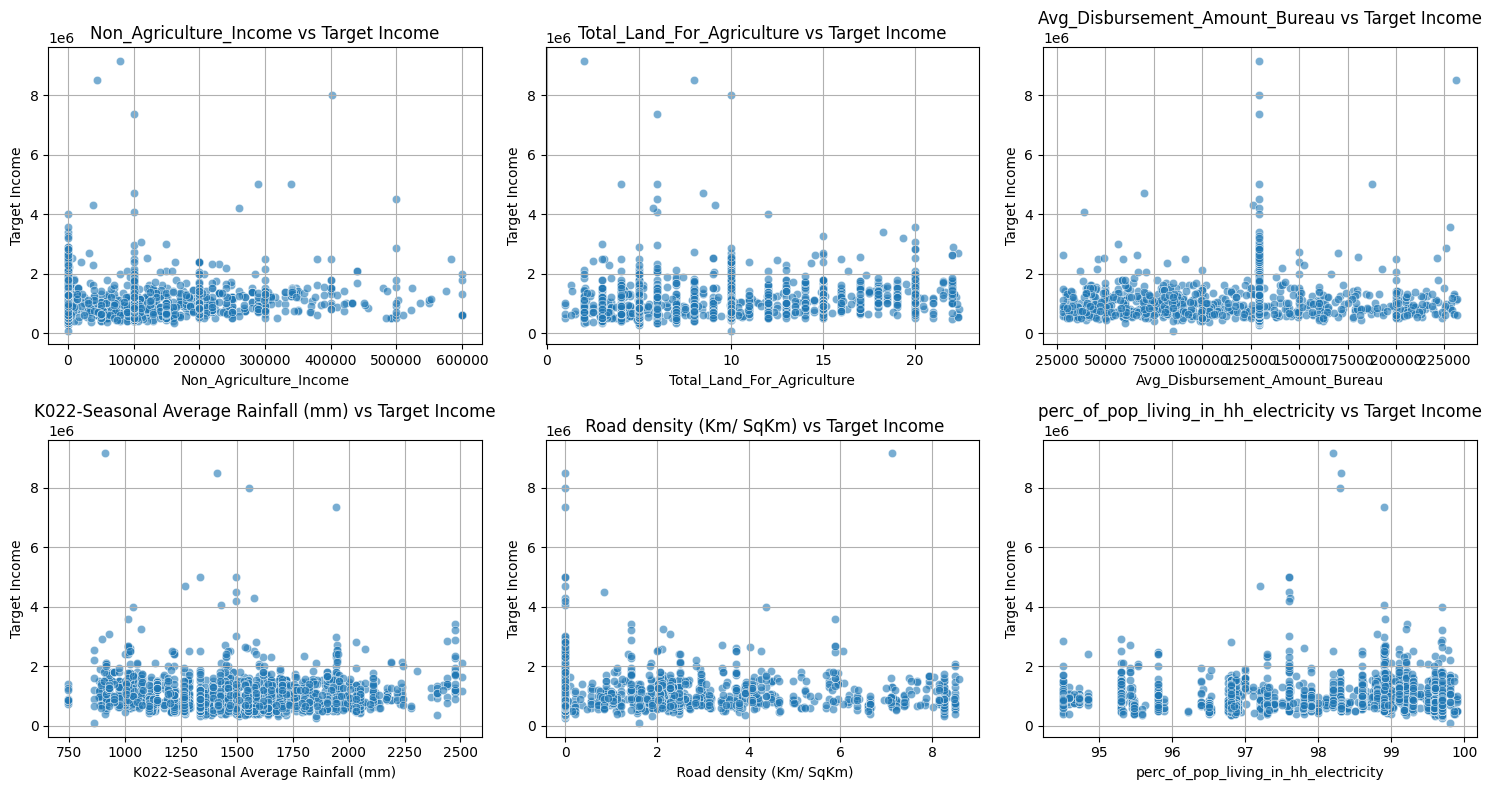


Generating Comprehensive Correlation Matrix Heatmap for Numerical Features...


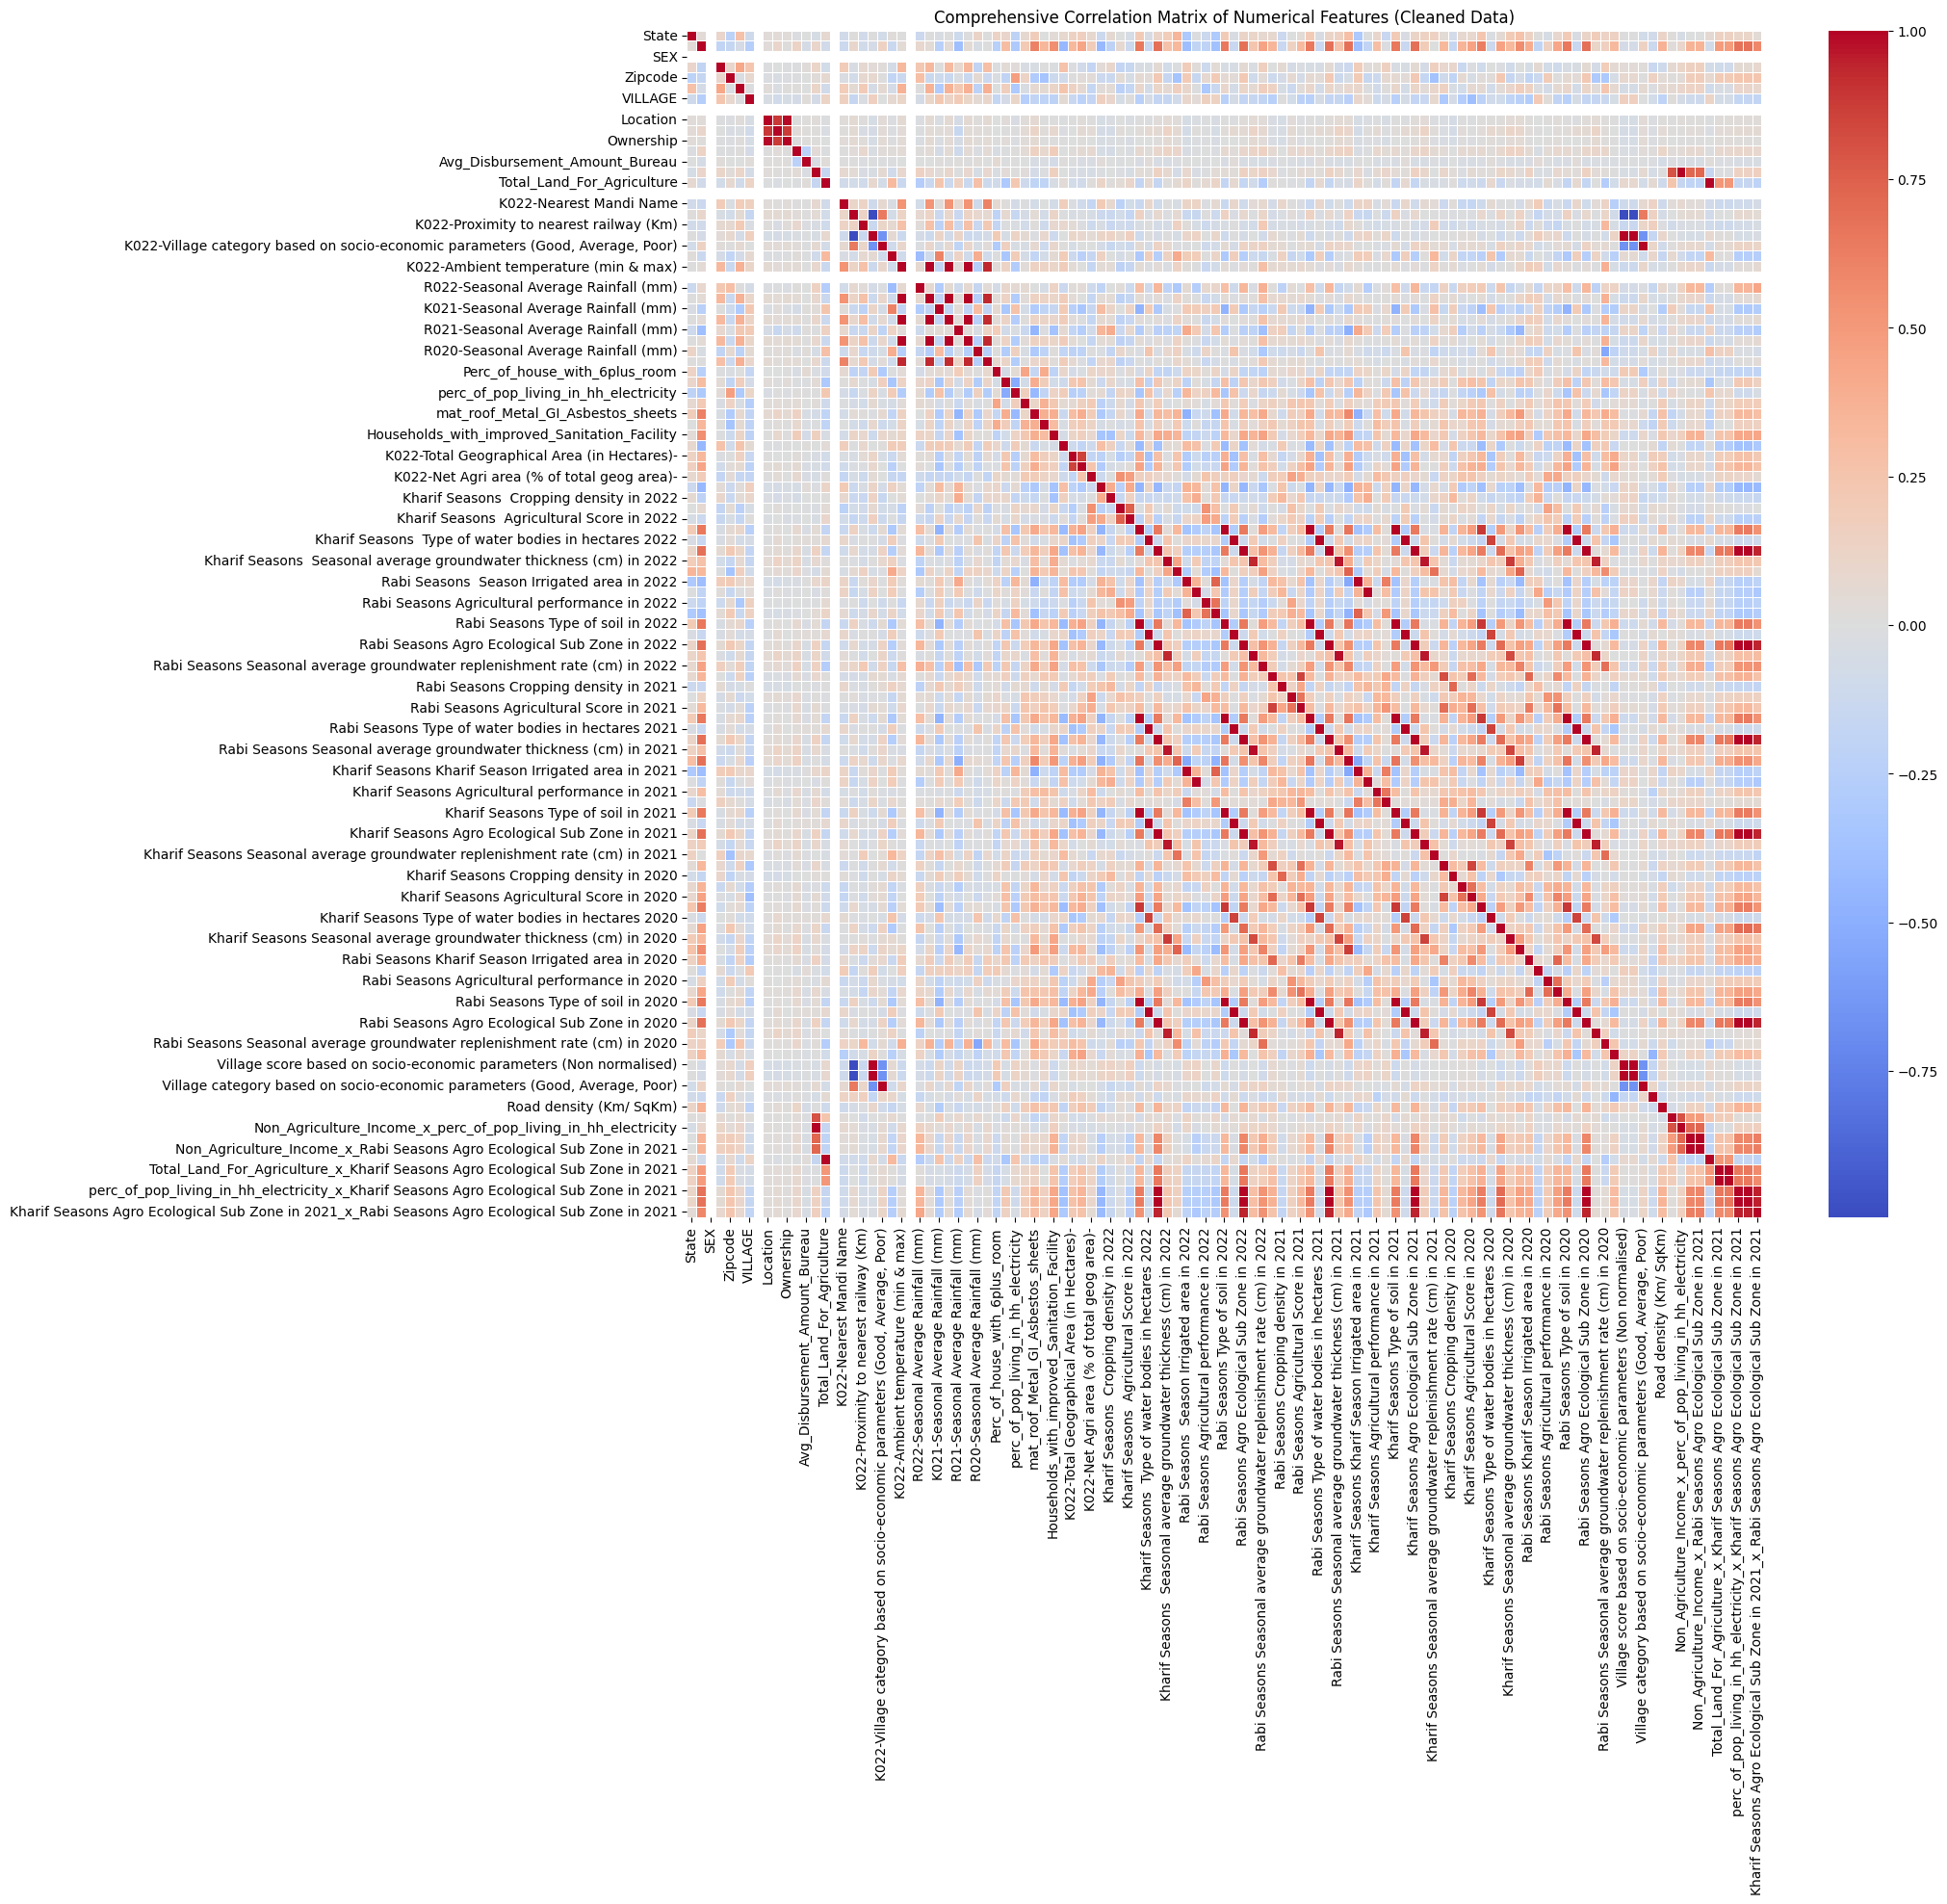


Additional numerical visualizations generated.


In [109]:
# Select a diverse subset of numerical features for visualization
# Let's pick some from the top correlated and some others from the selected features
numerical_features_for_detailed_plots = [
    'Non_Agriculture_Income',
    'Total_Land_For_Agriculture',
    'Avg_Disbursement_Amount_Bureau',
    'K022-Seasonal Average Rainfall (mm)',
    ' Road density (Km/ SqKm)',
    'perc_of_pop_living_in_hh_electricity',
    'Night light index',
    'Village score based on socio-economic parameters (0 to 100)'
]

# Ensure selected numerical features are actually in the cleaned data
numerical_features_for_detailed_plots = [col for col in numerical_features_for_detailed_plots if col in X_cleaned.columns]

print("Selected numerical features for detailed plotting:", numerical_features_for_detailed_plots)


# --- Generate More Detailed Distribution Plots (Histograms and Density Plots) ---

print("\nGenerating Detailed Distribution Plots for Numerical Features...")
n_cols = 3
n_rows = (len(numerical_features_for_detailed_plots) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numerical_features_for_detailed_plots):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(X_cleaned[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# --- Generate More Detailed Relationship Plots (Scatter Plots with Target) ---

print("\nGenerating Detailed Scatter Plots with Target Variable...")
n_cols = 3
n_rows = (len(numerical_features_for_detailed_plots) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numerical_features_for_detailed_plots):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(x=X_cleaned[col], y=y_cleaned, alpha=0.6)
    plt.title(f'{col} vs Target Income')
    plt.xlabel(col)
    plt.ylabel('Target Income')
    plt.grid(True)
plt.tight_layout()
plt.show()

# --- Generate Correlation Matrix Heatmap for a Larger Set of Numerical Features ---
# Let's include all numerical features in the cleaned data for a comprehensive view
if cleaned_numerical_cols:
    print("\nGenerating Comprehensive Correlation Matrix Heatmap for Numerical Features...")
    plt.figure(figsize=(18, 16)) # Adjust figure size for better readability of many features
    correlation_matrix_cleaned = X_cleaned[cleaned_numerical_cols].corr()
    sns.heatmap(correlation_matrix_cleaned, cmap='coolwarm', fmt=".2f", linewidths=.5) # Removed annot for clarity with many features
    plt.title('Comprehensive Correlation Matrix of Numerical Features (Cleaned Data)')
    plt.show()
else:
    print("\nNo numerical features available in cleaned data for correlation heatmap.")

print("\nAdditional numerical visualizations generated.")

**Reasoning**:
Generate more detailed and visually appealing distribution and relationship plots for the numerical features in the cleaned data, adding informative annotations.

## Summary of EDA Findings (Numerical Features):

Based on the generated visualizations for the numerical features in the cleaned data (`X_cleaned`):

**Distribution Plots:**
- Observe the shapes of the histograms and density plots (e.g., skewed, normal, multi-modal) to understand the distribution of individual features. Note features with heavy tails or unusual patterns, as these might require transformation or further investigation.
- Check for potential outliers or unusual values that might not have been fully addressed by the IQR method, although the outlier removal step significantly reduced the dataset size.

**Relationship Plots (Scatter Plots with Target Variable):**
- Examine the scatter plots to identify potential linear or non-linear relationships between the selected numerical features and the target variable ('Target_Variable/Total Income').
- Look for patterns, trends, or clusters of data points that might indicate important interactions or dependencies.
- Identify if any features appear to have little to no relationship with the target variable in the cleaned data.

**Correlation Matrix Heatmap:**
- Analyze the heatmap to understand the pairwise correlations between all numerical features in the cleaned data.
- Look for highly correlated features (both positive and negative), as these might indicate multicollinearity, which can affect some models.
- Pay attention to features that show higher correlations with the target variable (although correlation does not imply causation).
- Identify features that have very low correlations with other features, which might suggest they are unique or less related to the overall patterns.

**Overall Insights:**
- Synthesize the findings from the different plots to build a comprehensive understanding of the characteristics of the numerical features and their potential relevance to predicting the target variable.
- Use these insights to inform decisions about model selection, feature transformations, or further feature engineering if necessary.

**Reasoning**:
Initialize and train a Gradient Boosting Regressor model on the processed training data.